# Week3 practice HW : Clustering

- 일석사조 : 안준우, 박주형, 김태은, 이태주

# 데이터 출처 및 변수에 대한 소개

[데이터 출처](https://www.kaggle.com/datasets/vivovinco/nba-player-stats)

본 데이터는 [미국 NBA농구 선수들의 2021-2022시즌 동안의 기록에 대한 평균치 데이터](https://www.basketball-reference.com/leagues/NBA_2022_per_game.html)로 데이터셋은 non-null의 총 30개의 변수들과 784개의 관측치(행: 각 선수의 시즌평균기록)로 구성되어 있다.

다음은 데이터셋에 등장하는 각 변수에 대한 소개이다.
- `Rk` : Rank
- `Player` : Player's name
- `Pos` : Position
- `Age` : Player's age
- `Tm`  : Team 
- `G`   : Games Played
- `Gs`  : Games Started
- `MP`  : Minutes played per game
- `FG`  : Field Goals per game
- `FGA` : Field Goal attempts per game
- `FG%` : Field goal percentage
- `3P`  : 3-point field goals per game
- `3PA` : 3-point field goal attempts per game
- `3P%` : 3-point field goal percentage
- `2P`  : 2-point field goals per game
- `2PA` : 2-point field goal attempts per game
- `2P%` : 2-point field goal percentage
- `eFG%`: Effective field goal percentage
- `FT`  : Free Throws per game
- `FTA` : Free throw attempts per game
- `FT%` : Free throw percentage
- `ORB` : Offensive rebounds per game
- `DFB` : Defensive rebounds per game
- `TRB` : Total rebounds per game
- `AST` : Assists per game
- `STL` : Steals per game
- `BLK` : Blocks per game
- `TOV` : Turnovers per game
- `PF`  : Personal fouls per game
- `PTS` : Points per game

# Data Preprocessing

## Data Loading

데이터셋을 `basketball_origin`변수에 pandas DataFrame 객체로 불러오고,
데이터셋에 대한 정보와 Null값 유무를 확인하였다.

특징적인 부분은 dataset의 encoding 방식이 통상적으로 사용되는 `utf-8`방식이 아닌 `latin-1`방식을 사용한 점이다.

초기에 encoding관련 설정을 default인 `utf-8`으로 실행했을 때 에러가 발생했다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
basketball = '/content/drive/Shareddrives/22-1 데이터마이닝/data_week4/2021-2022_NBA_Player_Stats.csv'
basketball_origin = pd.read_csv(basketball, sep=';', encoding='latin-1') # 'utf-8'방식이 아닌 'latin-1'방식으로 encoding된 dataset

## Importing

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
%matplotlib inline

## 분석에 불필요한 Column 제거하기

In [ ]:
basketball_origin.info() # dataset 정보확인 : Object type 3개와 int64 혹은 float64 type의 숫자형 27개의 column으로 구성됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      784 non-null    int64  
 1   Player  784 non-null    object 
 2   Pos     784 non-null    object 
 3   Age     784 non-null    int64  
 4   Tm      784 non-null    object 
 5   G       784 non-null    int64  
 6   GS      784 non-null    int64  
 7   MP      784 non-null    float64
 8   FG      784 non-null    float64
 9   FGA     784 non-null    float64
 10  FG%     784 non-null    float64
 11  3P      784 non-null    float64
 12  3PA     784 non-null    float64
 13  3P%     784 non-null    float64
 14  2P      784 non-null    float64
 15  2PA     784 non-null    float64
 16  2P%     784 non-null    float64
 17  eFG%    784 non-null    float64
 18  FT      784 non-null    float64
 19  FTA     784 non-null    float64
 20  FT%     784 non-null    float64
 21  ORB     784 non-null    float64
 22  DR

In [ ]:
basketball_origin.isnull().sum() # null값 없음

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [ ]:
basketball_origin.shape

(784, 30)

### 숫자형이 아닌 변수들 제거

이 데이터 중 숫자형이 아닌 column의 경우 분석을 위해 drop해야 한다.
하지만 이후 해석을 위해 합쳐야 하기 때문에 Object type의 값으로 구성된 table과 숫자형으로만 구성된 table로 dataset을 나누어 준다.

In [ ]:
basketball_dummy = basketball_origin.copy()

In [ ]:
basketball_obj = basketball_dummy[['Player','Pos','Tm']].copy()
basketball_obj

,Player,Pos,Tm
0,Precious Achiuwa,C,TOR
1,Steven Adams,C,MEM
2,Bam Adebayo,C,MIA
3,Santi Aldama,PF,MEM
4,LaMarcus Aldridge,C,BRK
...,...,...,...
779,Thaddeus Young,PF,TOR
780,Trae Young,PG,ATL
781,Omer Yurtseven,C,MIA
782,Cody Zeller,C,POR


### 숫자형 변수들 중 불필요한 변수들

`Rk`,`Player`,`Pos`, `Tm`, `G`, `GS`의 7개 변수를 제거하는 이유는
이 데이터들의 경우 선수들의 경기력과는 직접적으로 관련된 지표가 아니기 때문이다. 

또한 Attempts와 관련된 `FGA`, `3PA`, `2PA`의 경우 시도 횟수이기 때문에 직접적인 경기력과는 관련이 없을 것으로 판단되었고, 또한 이미 각 경우에 대한 득점 수와 성공률 역시 변수로 존재하고 있기 때문에 FA의 적절한 해석을 위해 제거하였다.

`FG`와 `2P`의 경우 각각 `FG%`와 `2P%`가 존재하고, 2점슛의 경우 농구의 대부분의 필드골이 이에 해당하므로 성공률만을 남기고 제거하였다.

다만 `3P`의 경우는 필드골 중 3점슛이 성공하는 경우가 2점슛에 비해 많은 편이 아니고, 이를 삭제할 경우 3점슛의 성공률이 100%일 때 해당 선수가 1회 던져 성공한 것인지 혹은 10회던져 10회 모두 성공한 것인지 그 능력을 구분하기 어렵게 된다. 따라서 `3P`는 예외적으로 삭제하지 않는 결정을 내렸다.

`FT`를 제거하는 이유는 자유투 득점 횟수 자체보다는 그 성공률이 중요하기 때문이다.

반대로 `FT%`(자유투 성공률)와 `FTA`(파울을 당하여 자유투를 얻기 때문에 일종의 중요한 상황에서의 피파울 횟수라고 해석할 수 있음)는 제외하지 않았다.

In [ ]:
basketball_num = basketball_dummy.drop(['Rk','Player','Pos','Tm', 'G', 'GS', 'FGA', '3PA', '2PA', 'FG', '2P','FT'], axis = 1)
basketball_num

,Age,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,22,23.2,0.434,0.6,0.361,0.452,0.471,1.8,0.590,2.1,4.7,6.8,1.1,0.5,0.6,1.2,2.1,8.5
1,28,26.4,0.557,0.0,0.000,0.559,0.557,2.7,0.547,4.7,5.2,9.9,3.3,0.8,0.8,1.6,1.9,7.2
2,24,33.0,0.541,0.0,0.000,0.545,0.541,6.0,0.751,2.4,7.9,10.3,3.5,1.5,0.8,2.8,3.2,19.0
3,21,10.3,0.381,0.1,0.103,0.569,0.402,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,36,22.8,0.554,0.3,0.311,0.580,0.569,2.3,0.873,1.6,4.0,5.6,0.9,0.3,1.0,0.9,1.6,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,33,17.9,0.446,0.6,0.471,0.439,0.500,1.2,0.333,1.6,2.8,4.5,1.5,1.0,0.3,1.0,1.8,6.1
780,23,34.9,0.456,3.0,0.380,0.504,0.529,7.2,0.900,0.6,3.2,3.8,9.5,1.0,0.1,4.0,1.6,28.0
781,23,12.8,0.545,0.0,0.143,0.558,0.547,1.2,0.632,1.5,3.9,5.4,0.9,0.3,0.4,0.8,1.6,5.7
782,29,13.1,0.567,0.0,0.000,0.593,0.567,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


본격적인 EDA 및 이상치 탐지의 경우 `basketball_num`를 활용해 진행한다.

다만 농구 NBA 선수들의 dataset인 만큼 outlier가 존재하더라도 선수 개개인의 특성을 나타내는 값이기 때문에 다른 값으로 대체하지는 않았다.


## EDA

### 기초통계량 확인

우선 가장 먼저 데이터의 개수, 4분위수, 최대 및 최소값을 확인해보자.

In [ ]:
basketball_num.describe()

,Age,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,26.100765,17.943878,0.419594,0.847959,0.274278,0.478568,0.480389,1.544133,0.642980,0.797959,2.503699,3.300893,1.768878,0.563393,0.348852,0.961224,1.544388,7.652423
std,4.099815,9.823304,0.154784,0.842878,0.163829,0.190346,0.163595,1.615393,0.293625,0.736216,1.813945,2.373101,1.850650,0.426635,0.366125,0.829579,0.836946,6.237066
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,10.000000,0.376000,0.100000,0.211000,0.429000,0.450750,0.500000,0.584500,0.300000,1.200000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.100000
50%,25.000000,16.950000,0.435000,0.600000,0.320000,0.503000,0.511500,1.100000,0.750000,0.600000,2.200000,2.900000,1.100000,0.500000,0.300000,0.800000,1.500000,6.100000
75%,29.000000,25.900000,0.492000,1.300000,0.372000,0.572250,0.557000,2.000000,0.833000,1.100000,3.300000,4.425000,2.300000,0.800000,0.500000,1.300000,2.200000,10.400000
max,41.000000,38.100000,1.000000,4.500000,1.000000,1.000000,1.000000,11.900000,1.000000,4.700000,11.200000,14.800000,10.700000,2.300000,2.800000,4.800000,4.500000,29.900000


각 Feature마다 분포의 치우침은 어느 정도인지 `skew`와 `kurtosis`를 이용해 관찰해본다.

In [ ]:
basketball_num.describe().agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Age,2.820121,7.964965
MP,2.818804,7.958877
FG%,2.828421,7.999974
3P,2.828278,7.999366
3P%,2.828421,7.999973
2P%,2.828421,7.999974
eFG%,2.828421,7.999973
FTA,2.827351,7.995387
FT%,2.828420,7.999969
ORB,2.828267,7.999317


확인 결과 전반적으로 2.8 근방의 값을 가지고 있는 것을 확인 가능하다. 특별히 더 치우침이 심한 Feature는 확인되지 않았다.

### Factor Analysis를 진행해야 하는 이유

또한 데이터의 Feature 값들이 다양하기 때문에 이들의 상관관계를 heat-map으로 살펴보면 아래와 같다.

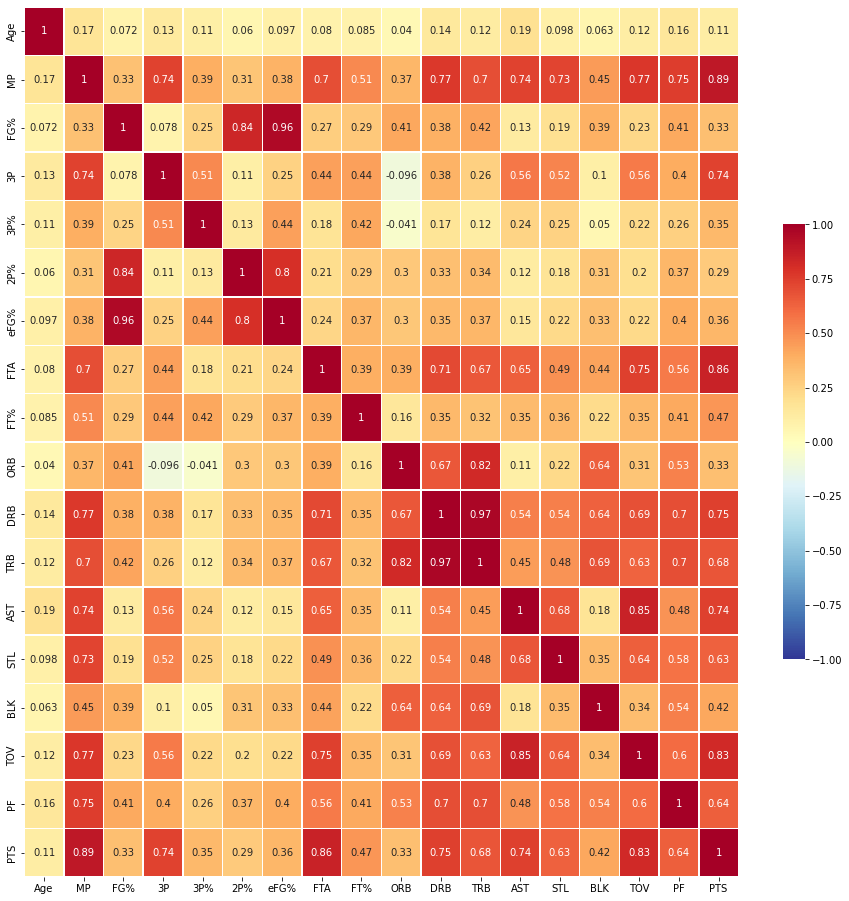

In [ ]:
fig, ax = plt.subplots( figsize=(16,16) )
sns.heatmap(basketball_num.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

히트맵 확인 결과 실제로 서로 상관관계가 매우 높은 변수들이 존재하고

해당 변수들 중 서로 비슷한 의미를 내포하는 경우도 다수 존재하기 때문에,

PCA 혹은 FA를 거쳐 의미 있는 적은 변수들로 만들어볼 필요가 있다.

### 표준화(Z)

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
basketball_scale = pd.DataFrame(StandardScaler().fit_transform(basketball_num), columns=basketball_num.columns, index = basketball_num.index)

변화된 분포의 평균과 표준편차 등을 확인해보자.

In [ ]:
basketball_scale.describe()

,Age,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02,7.840000e+02
mean,3.717265e-16,1.420349e-16,-5.296217e-17,-8.553249e-17,7.816876e-17,-8.071775e-18,-8.779825e-17,1.578952e-16,5.848496e-17,1.699321e-16,-1.515228e-16,1.331135e-16,7.480552e-17,-1.263870e-17,-1.416101e-18,-2.227527e-16,-2.296915e-16,-3.115422e-18
std,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00
min,-1.733078e+00,-1.725966e+00,-2.712562e+00,-1.006671e+00,-1.675242e+00,-2.515805e+00,-2.938322e+00,-9.564972e-01,-2.191198e+00,-1.084558e+00,-1.381132e+00,-1.391850e+00,-9.564244e-01,-1.321394e+00,-9.534316e-01,-1.159430e+00,-1.846443e+00,-1.227710e+00
25%,-7.568012e-01,-8.091930e-01,-2.818257e-01,-8.879540e-01,-3.864912e-01,-2.605743e-01,-1.812885e-01,-6.467773e-01,-1.992915e-01,-6.768084e-01,-7.191682e-01,-7.171960e-01,-6.860766e-01,-6.177675e-01,-6.801261e-01,-6.769494e-01,-6.508604e-01,-7.303642e-01
50%,-2.686629e-01,-1.012401e-01,9.959305e-02,-2.943695e-01,2.792615e-01,1.284399e-01,1.902917e-01,-2.751134e-01,3.647128e-01,-2.690591e-01,-1.675315e-01,-1.690399e-01,-3.616592e-01,-1.486830e-01,-1.335153e-01,-1.944691e-01,-5.306922e-02,-2.490617e-01
75%,7.076138e-01,8.104403e-01,4.680824e-01,5.366489e-01,5.968683e-01,4.924835e-01,4.685945e-01,2.823824e-01,6.475668e-01,4.105231e-01,4.392688e-01,4.739894e-01,2.871756e-01,5.549437e-01,4.130956e-01,4.086312e-01,7.838384e-01,4.408051e-01
max,3.636444e+00,2.053178e+00,3.752163e+00,4.335590e+00,4.432581e+00,2.741143e+00,3.178224e+00,6.414836e+00,1.216683e+00,5.303515e+00,4.797199e+00,4.848697e+00,4.829019e+00,4.073077e+00,6.699120e+00,4.630334e+00,3.533678e+00,3.569271e+00


### 시각화 및 추가 변수 dropping

결과적으로 `data_scale`의 모든 변수들이 표준화 된 것을 확인했다. 추가로 이들의 분포를 시각화해보면 아래와 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

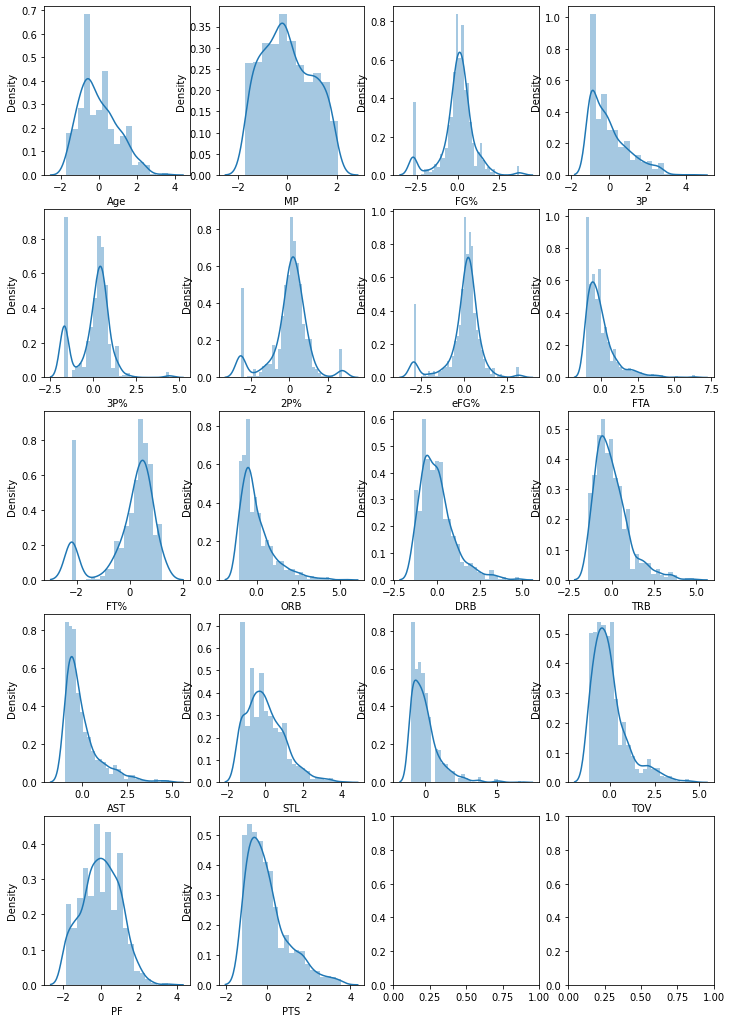

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(12, 18))

col_names = basketball_scale.columns

for i in range(0, len(col_names)):
  j = i//4
  k = i%4
  sns.distplot(basketball_scale[col_names[i]], ax=ax[j,k])

표준화된 데이터 `data_scale`의 correlation값 중 그 데이터의 상관관계가 크지 않은 경우, 해당되는 column에 대해서는 PCA 및 FA를 진행하지 않아도 변수들 사이에 다중공선성을 띌 확률이 낮다.

따라서 correlation 값이 0.3 미만으로 등장하는 column의 경우는 추가로 제외한 후에 PCA 및 FA를 진행해준다. 

In [ ]:
corr_tb = basketball_scale.corr()
corr_tb

,Age,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.171100,0.071576,0.133682,0.107445,0.059551,0.097035,0.080205,0.085003,0.039927,0.142332,0.121755,0.191194,0.097836,0.062741,0.116280,0.156024,0.114612
MP,0.171100,1.000000,0.327829,0.737352,0.392777,0.305933,0.381846,0.696949,0.512265,0.367075,0.767766,0.701255,0.740403,0.727123,0.454256,0.773896,0.751168,0.894717
FG%,0.071576,0.327829,1.000000,0.077831,0.248385,0.840854,0.956679,0.269110,0.292839,0.414188,0.383956,0.422864,0.132356,0.193716,0.387003,0.228025,0.412083,0.330469
3P,0.133682,0.737352,0.077831,1.000000,0.514812,0.105562,0.251188,0.438883,0.442653,-0.095771,0.379584,0.260593,0.563814,0.523770,0.102483,0.556946,0.399812,0.740622
3P%,0.107445,0.392777,0.248385,0.514812,1.000000,0.134295,0.440423,0.177743,0.415576,-0.040807,0.169266,0.116786,0.243741,0.250530,0.049827,0.223025,0.260455,0.352643
2P%,0.059551,0.305933,0.840854,0.105562,0.134295,1.000000,0.799243,0.209786,0.285288,0.296538,0.329127,0.344144,0.118120,0.178698,0.312026,0.202450,0.365475,0.286287
eFG%,0.097035,0.381846,0.956679,0.251188,0.440423,0.799243,1.000000,0.241909,0.366557,0.304077,0.354150,0.365672,0.153697,0.224463,0.329478,0.223702,0.402761,0.360091
FTA,0.080205,0.696949,0.269110,0.438883,0.177743,0.209786,0.241909,1.000000,0.393996,0.392041,0.712388,0.667305,0.645915,0.489718,0.435570,0.749705,0.557667,0.857540
FT%,0.085003,0.512265,0.292839,0.442653,0.415576,0.285288,0.366557,0.393996,1.000000,0.155199,0.352687,0.318025,0.345545,0.357194,0.218695,0.351704,0.411322,0.470004
ORB,0.039927,0.367075,0.414188,-0.095771,-0.040807,0.296538,0.304077,0.392041,0.155199,1.000000,0.668406,0.821571,0.106682,0.220835,0.641198,0.311047,0.532250,0.331288


위의 `corr_tb`에서 특정 열과 상관계수가 1인 경우(자기자신)를 제외하고, 나머지 값 중 적어도 하나가 0.3 이상인지 확인한다.

만약 이를 만족하지 않는 index가 있다면 해당 Featue는 drop하고 PCA 및 FA를 진행한다.

0.3보다 작은 상관관계만을 갖는 Feature가 있는 지 heatmap으로 표현해보자.

In [ ]:
not_corr = corr_tb[corr_tb < 0.3]
not_corr

,Age,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,NaN,0.1711,0.071576,0.133682,0.107445,0.059551,0.097035,0.080205,0.085003,0.039927,0.142332,0.121755,0.191194,0.097836,0.062741,0.116280,0.156024,0.114612
MP,0.171100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FG%,0.071576,NaN,NaN,0.077831,0.248385,NaN,NaN,0.269110,0.292839,NaN,NaN,NaN,0.132356,0.193716,NaN,0.228025,NaN,NaN
3P,0.133682,NaN,0.077831,NaN,NaN,0.105562,0.251188,NaN,NaN,-0.095771,NaN,0.260593,NaN,NaN,0.102483,NaN,NaN,NaN
3P%,0.107445,NaN,0.248385,NaN,NaN,0.134295,NaN,0.177743,NaN,-0.040807,0.169266,0.116786,0.243741,0.250530,0.049827,0.223025,0.260455,NaN
2P%,0.059551,NaN,NaN,0.105562,0.134295,NaN,NaN,0.209786,0.285288,0.296538,NaN,NaN,0.118120,0.178698,NaN,0.202450,NaN,0.286287
eFG%,0.097035,NaN,NaN,0.251188,NaN,NaN,NaN,0.241909,NaN,NaN,NaN,NaN,0.153697,0.224463,NaN,0.223702,NaN,NaN
FTA,0.080205,NaN,0.269110,NaN,0.177743,0.209786,0.241909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT%,0.085003,NaN,0.292839,NaN,NaN,0.285288,NaN,NaN,NaN,0.155199,NaN,NaN,NaN,NaN,0.218695,NaN,NaN,NaN
ORB,0.039927,NaN,NaN,-0.095771,-0.040807,0.296538,NaN,NaN,0.155199,NaN,NaN,NaN,0.106682,0.220835,NaN,NaN,NaN,NaN


correlation coefficient가 0.3 미만인 경우에 대해 히트맵으로 시각화해보면 아래와 같다.

색상은 주황색인 `cmap = "Oranges"`를 이용해 PCA 및 FA에 불필요한 column이 있는 지 확인해본다.

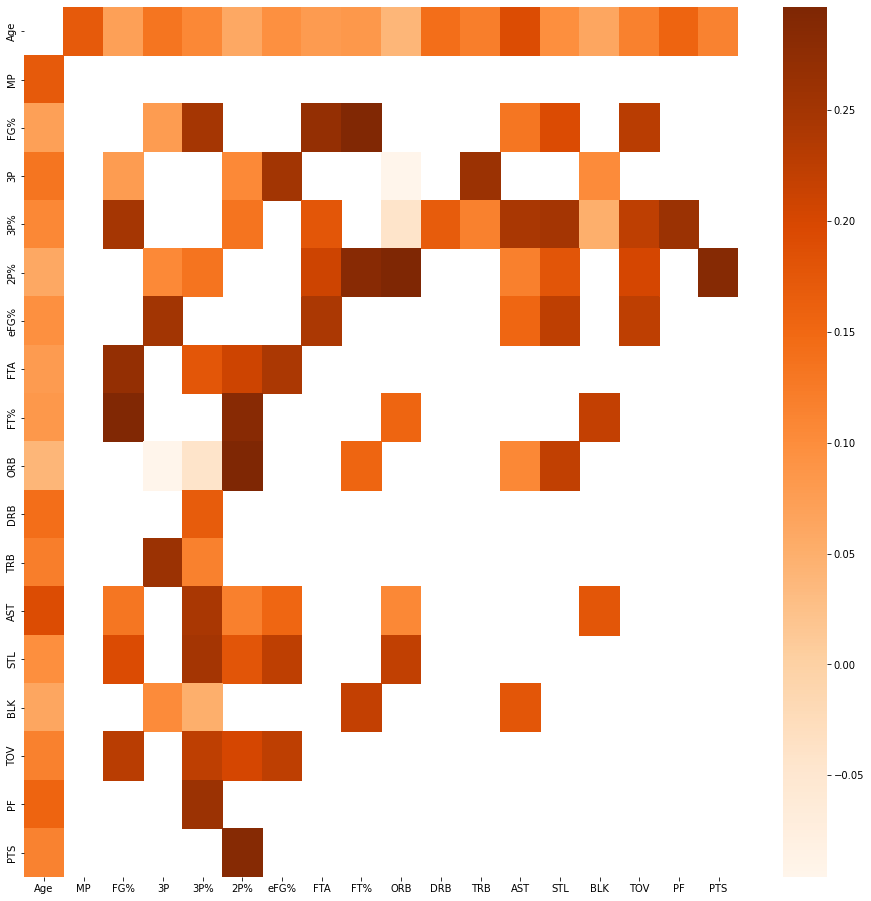

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(not_corr, cmap="Oranges")

출력 결과, 어느 정도의 예상대로 `Age` 변수는 타 변수들과 비교적 낮은 상관관계를 보임을 알 수 있고,

`Age`변수를 제외한 PCA & FA에 활용할 데이터프레임 `data_scale`을 정의하자.

In [ ]:
data_scale = basketball_scale.drop(['Age'], axis=1).copy()
data_scale

,MP,FG%,3P,3P%,2P%,eFG%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.535408,0.093128,-0.294369,0.529682,-0.139665,-0.057428,0.158494,-0.180548,1.769688,1.211560,1.475428,-0.361659,-0.148683,0.686401,0.288011,0.664280,0.135980
1,0.861372,0.888290,-1.006671,-1.675242,0.422829,0.468595,0.715990,-0.327087,5.303515,1.487379,2.782570,0.827871,0.554944,1.233012,0.770491,0.425164,-0.072584
2,1.533673,0.784854,-1.006671,-1.675242,0.349232,0.370730,2.760141,0.368121,2.177437,2.976798,2.951233,0.936010,2.196739,1.233012,2.217932,1.979421,1.820539
3,-0.778634,-0.249502,-0.887954,-1.046136,0.475398,-0.479470,-0.522889,-0.146469,0.138690,-0.553677,-0.379869,-0.686077,-1.086852,-0.133515,-0.797569,-0.650860,-0.698277
4,0.494663,0.868895,-0.650520,0.224291,0.533225,0.541993,0.468214,0.783882,1.090105,0.825415,0.969438,-0.469798,-0.617768,1.779623,-0.073849,0.066489,0.938151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.004470,0.170705,-0.294369,1.201543,-0.208005,0.119951,-0.213169,-1.056373,1.090105,0.163451,0.505614,-0.145381,1.024028,-0.133515,0.046771,0.305605,-0.249062
780,1.727214,0.235352,2.554836,0.645731,0.133697,0.297331,3.503469,0.875895,-0.269059,0.384105,0.210453,4.180184,1.024028,-0.680126,3.665373,0.066489,3.264446
781,-0.523975,0.810713,-1.006671,-0.801823,0.417572,0.407429,-0.213169,-0.037417,0.954189,0.770251,0.885107,-0.469798,-0.617768,0.139790,-0.194469,0.066489,-0.313235
782,-0.493415,0.952937,-1.006671,-1.675242,0.601565,0.529760,0.158494,0.453318,1.497855,0.163451,0.547780,-0.523868,-0.617768,-0.406821,-0.315089,0.664280,-0.393452


이제 본격적으로 `data_scale`을 활용해 PCA 및 FA를 진행해보자.

## Factor Analysis 조건검정

In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 340 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=63731380e4f235073dfc28e505919a8950cbd304163580e7f9e97b319a6c2a96
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


### Bartlett test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(20444.603202315982, 0.0)

요인분석에 앞서 첫 번째 조건으로 Bartlett test 실행 결과 p_value < 0.05로 상관관계 행렬이 단위 행렬이 아님을 보였다.  

### KMO test

- KMO Test (Kaiser-Meyer-Olkin Test)
  - 변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값 (관측된 모든 변수 간 분산 비율)
    - 입력 변수들 간 상관계수제곱들과 편상관계수제곱들을 모두 더한 값 중에서 상관계수제곱의 합이 차지하는 비율 값
  - 이 값이 작으면 요인분석을 위한 변수들의 선정이 적절하지 못하다는 것을 의미
  - 일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음
  - 변수가 최소 3개 이상일 경우 사용 가능

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.7927766397951085

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7927766397951085

# **Principal Component Analysis**

## Principle component 수를 선택하기

본격적으로 PCA를 진행하려면 Principal Component의 수를 몇 개로 설정하는 것이 최선인지를 판단해야 한다.

이를 판단하는 방법에는 대표적으로 세 가지가 존재한다.

첫 번째는 각 Feature의 Eigenvalue를 계산하여 이 값이 1보다 크거나 같은 개수(차원) 만큼 PC의 수를 설정하는 방식이다.

두 번째는 Eigenvalue를 그래프 상에 나타낸 Scree Plot에서 차원(변수의 수)이 하나 커질 때마다 기울기의 변화를 살피고, 급격한 변화가 존재하는 지점을 기준으로 PC의 개수를 설정한다.

세 번째는 Total Variance는 선형 변환을 하더라도 변하지 않기 때문에 이를 80% 이상 설명하도록 하려면 과연 몇 개의 PC가 필요한 지 고려하는 방식이다.

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)

###방안 1. Eigen value가 1 이상일 때까지

In [ ]:
from factor_analyzer import FactorAnalyzer
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None)  
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1)) # 0.88 ~= 1

eigen value: [8.39009270e+00 2.56562079e+00 1.97722425e+00 8.82363827e-01
 6.11805936e-01 5.83212990e-01 4.46348049e-01 3.86202963e-01
 3.12128332e-01 2.47172106e-01 1.95147159e-01 1.61413940e-01
 1.23228387e-01 7.02369539e-02 3.89043644e-02 8.66796521e-03
 2.29291288e-04] 

적합한 PC 개수: 3


FactorAnalyzer 객체의 `get_eigenvalues()`를 활용하여 Eigenvalue를 계산하고, 조건인 1 이상을 만족하는 PC의 개수를 찾아보면 적합한 PC 개수는 3개라는 결과를 얻는다.

하지만 4번째 PC변수가 0.88로 상대적으로 이후의 PC변수들에 비해 1과의 차이가 작은 편이기 때문에 이 점도 염두해두어야 한다.

###방안 2. Scree plot 그래프 기울기가 완만해지기 전까지
Scree plot: 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수

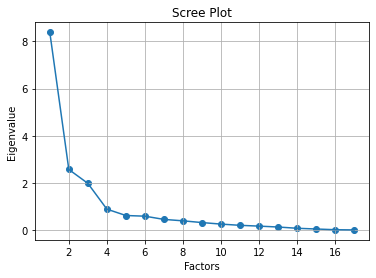

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

기울기를 산점도와 이를 이은 그래프로 시각화했지만, 시각으로만 판단하기에는 그 기준점이 애배할 수 있다.

따라서 이를 객관화 하기위해 아래처럼 단위 차원 증가에 따른 기울기의 변화를 절댓값 수치로 표현하였고, 5 -> 6 부분 이후로 기울기가 완만하게 나타나기 때문에 완만해지기 전인 4까지 사용하는 것이 바람직해 보인다.

In [ ]:
# 기울기 확인

for i in range(0, len(ev)-1):
    slope = abs( (ev[i] - ev[i+1])/1 )
    print('{:2} -> {:2} : {:0.3f}'.format(i+1, i+2, slope))

 1 ->  2 : 5.824
 2 ->  3 : 0.588
 3 ->  4 : 1.095
 4 ->  5 : 0.271
 5 ->  6 : 0.029
 6 ->  7 : 0.137
 7 ->  8 : 0.060
 8 ->  9 : 0.074
 9 -> 10 : 0.065
10 -> 11 : 0.052
11 -> 12 : 0.034
12 -> 13 : 0.038
13 -> 14 : 0.053
14 -> 15 : 0.031
15 -> 16 : 0.030
16 -> 17 : 0.008


### 분산 설명 비율



In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [4.93534865e-01 1.50918870e-01 1.16307309e-01 5.19037545e-02
 3.59885845e-02 3.43066465e-02 2.62557676e-02 2.27178214e-02
 1.83604901e-02 1.45395356e-02 1.14792447e-02 9.49493765e-03
 7.24872867e-03 4.13158552e-03 2.28849202e-03 5.09880306e-04
 1.34877228e-05]
누적 분산 설명 비율:
 [0.49353486 0.64445373 0.76076104 0.8126648  0.84865338 0.88296003
 0.9092158  0.93193362 0.95029411 0.96483364 0.97631289 0.98580783
 0.99305655 0.99718814 0.99947663 0.99998651 1.        ]


PC 4까지 채택할 경우, 누적 분산 설명 비율은 약 81.2%로 80%를 상회한다.

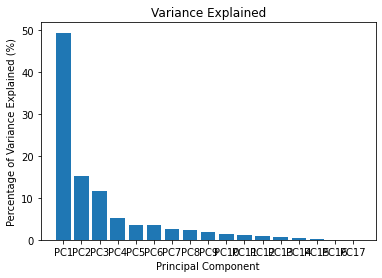

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

### 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.8 이상
print('적합한 PC 개수:', d) # 5개 선택 (PC4까지 활용)

적합한 PC 개수: 4


## PCA 진행
- 방안 1에서는 3개로 등장했고,  2와 3에서 공통적으로 4개로 나타났기 때문에 PC는 총 4개를 사용하여 진행해보고자 한다.

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (4개): Eigen Vector
# pca.components_[n_components, n_features]
# 수정된 data_scale의 column을 index로하고 pc변수를 Column으로 하는 table
pd.DataFrame(pca.components_[:,:4], 
             columns = ['PC1','PC2','PC3','PC4'], 
             index=data_scale.columns)

,PC1,PC2,PC3,PC4
MP,0.317304,0.183935,0.209205,0.130629
FG%,-0.144826,0.450720,-0.300733,-0.062421
3P,-0.045921,-0.240155,-0.299236,-0.440181
3P%,-0.039476,0.218631,-0.116103,-0.524231
2P%,0.115729,-0.001620,0.104550,0.185165
eFG%,-0.034780,0.052826,0.142846,0.416634
FTA,0.126103,-0.066708,0.493992,-0.356766
FT%,-0.211692,0.084948,-0.318842,0.238138
ORB,-0.042094,0.011919,-0.207445,0.076604
DRB,-0.043658,0.090705,-0.072187,-0.015883


In [ ]:
# X_p = pca.fit_transform(data_scale)
# 기존 data_scale의 index와 pc변수 결합 table
X_pp = pd.DataFrame(X_p[:,:4], 
                    columns = ['PC1','PC2','PC3','PC4'], 
                    index = data_scale.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC4로 총 4개 변수로 축소)

,PC1,PC2,PC3,PC4
0,1.627627,0.912872,1.612038,-1.154068
1,3.475188,2.709535,4.298040,0.181600
2,6.101500,0.526816,3.710257,1.217364
3,-2.140942,1.006670,0.599582,0.269761
4,1.806213,1.831326,0.789517,-0.934994
...,...,...,...,...
779,0.467750,0.366408,0.369382,-0.489584
780,5.761628,-4.157914,-1.354359,2.581829
781,0.044259,1.954121,1.107756,0.181030
782,0.015871,2.187856,1.141180,0.563078


## PCA 해석

### score plot
- 주성분과 원 데이터 간의 관계를 보여주는 그래프
- 정규분포를 따르고 이상치가 없는 경우, 두 주성분 간 Correlation이 강하지 않은 경우 0 주위로 무작위의 형태로 점이 찍힘.
- 각 주성분이 어떤 변수로 구성되어 있는 지, 그 주성분이 어떤 것을 표현하고 있는 지, 각 주성분을 변수로 보고 해석한다.

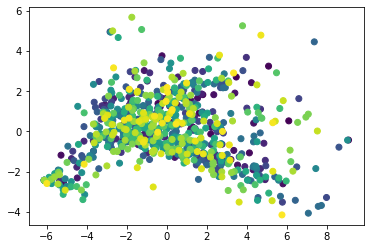

In [ ]:
# Principal Component Pattern Plot 1

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

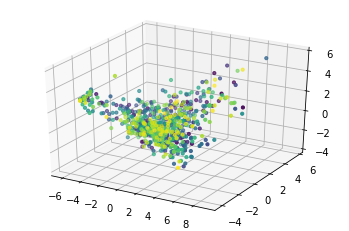

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)
plt.show()

### biplot
- biplot = score plot + loading plot
  - 주성분과 원 데이터의 변수 간의 상관관계를 보여주는 그래프
  - 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수
  - 각 빨간선의 길이는 원변수의 분산을 표현하고, 길이가 길수록 분산이 큼을 의미한다.
  - 각 빨간선이 가까울 수록 서로 상관관계가 있다. 멀면 상관관계가 작다.

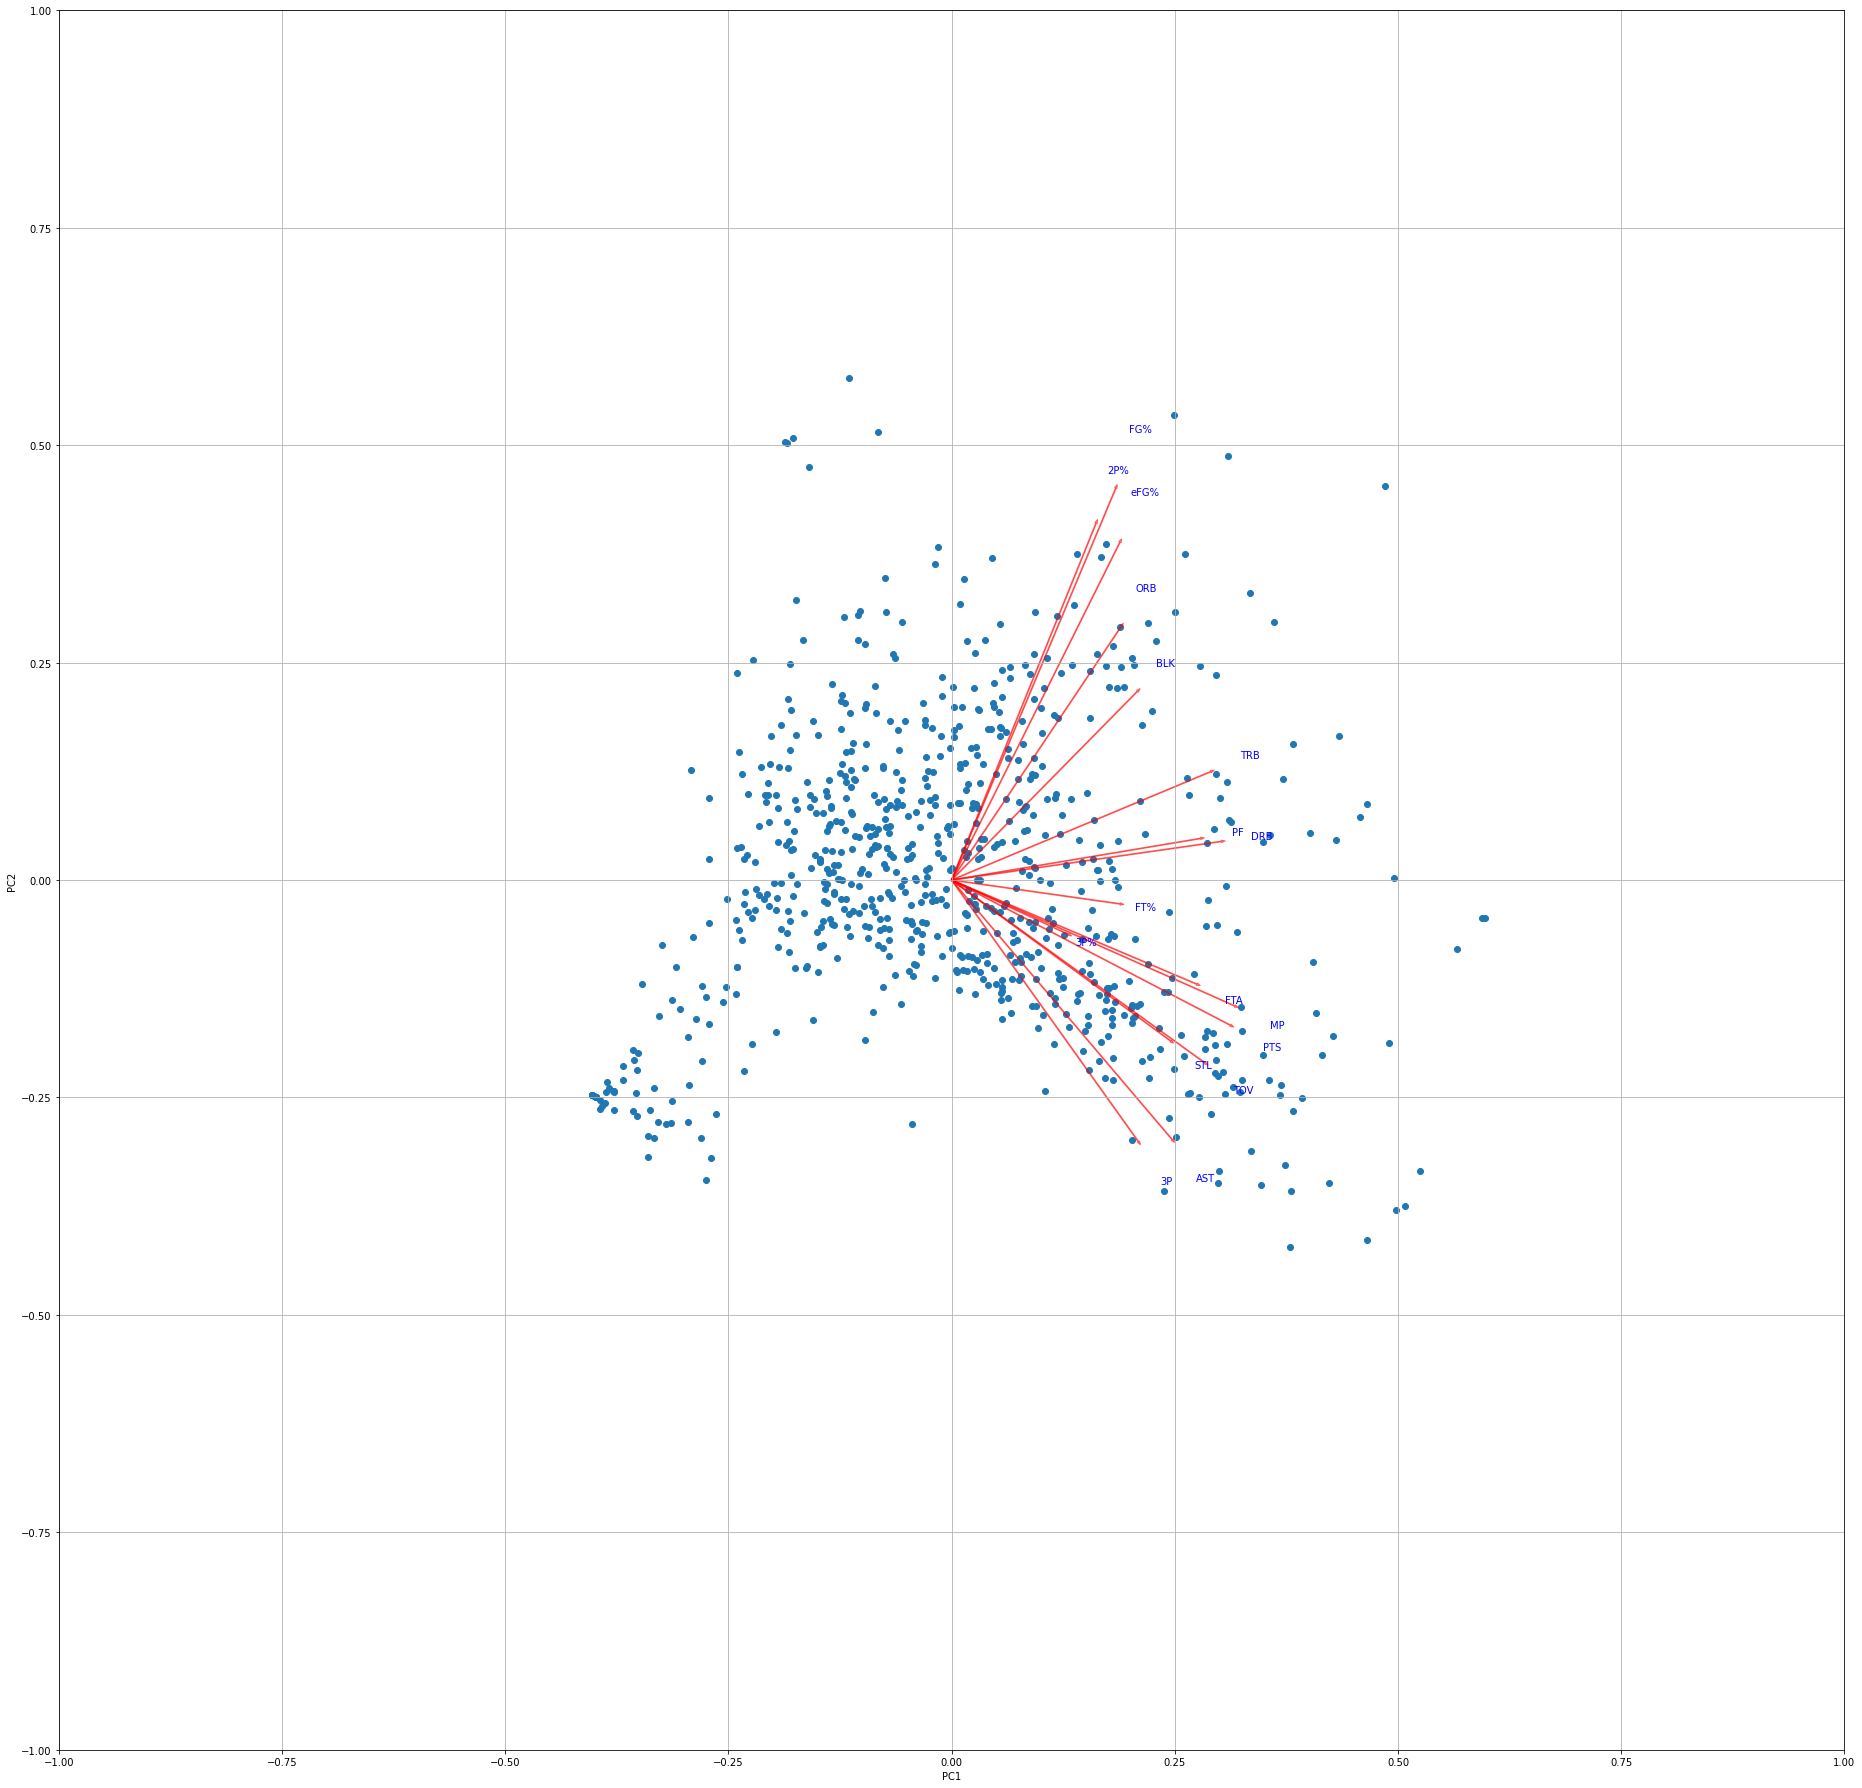

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  plt.figure(figsize=(32,32))

  pca1=pcax-1
  pca2=pcay-1
  xs = score.iloc[:,pca1]
  ys = score.iloc[:,pca2]
  n=coeff.shape[0]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='b', ha='center', va='center')
  plt.xlim(-1,1) # 범위는 최대 1에서 최소 -1
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(X_pp, pca.components_.T, 1, 2, labels=data_scale.columns)

# Factor Analysis

## Factor 해석을 위한 함수 정의

Factor Analysis를 통해 얻은 Factor들이 각각 대표하는 Feature들을 보다 명확히 표현하기 위해 아래의
`meaningfulFactor()`,`relationalFactor()`,`wrap()` 함수를 구현했고,

 각 요인과 Factor의 factor loadings 값이 0.5 이상인 경우를 찾아 DataFrame으로 반환되도록 했다.

 Factor loadings 값은 일반적으로 0.5보다 큰 경우 관련성이 크다고 판단할 수 있고, 최소 0.3 이상인 경우에도 관련성이 높다고 판단된다.

In [ ]:
# factor loadings 값이 0.5 이상인 Factor와 Feature를 연결하는 함수
def meaningfulFactor(df, factor):
  return (df.index[df[factor]>=0.5].tolist())

In [ ]:
# 여러 개의 Factor와 관련있는 Feature를 mapping해서 DataFrame 객체로 반환하는 함수
def relationalFactor(df, num):
  li = []
  names = []
  for i in range(0,num):
    li.append(meaningfulFactor(df, 'Factor{}'.format(str(i+1))))
    names.append("Factor{}".format(i+1))
  li = pd.DataFrame(li)
  li.index = names
  return li

In [ ]:
# 관련된 Feature의 최대 개수에 맞추어 column명을 설정해주는 함수
def wrap(content):
  numb = len(content.columns)
  col_name = list(content.columns.values)
  for j in range(0, numb):
    col_name[j] = "Related Feature {}".format(j+1)
  content.columns = col_name
  return content

## EFA 진행

### FA 개수 선택 : 3인 경우

PCA 1번에서 eigenvalue가 1을 초과하는 경우로 적정 PC개수가 3개로 등장했기 때문에 3부터 탐색을 시작해보자.

회전방식의 경우 `Orthogonal Rotation`보다 덜 strict한 `Oblique Rotation` 중 `promax`방식을 활용하였다.

`promax`방식의 경우 `Oblique Rotation`에서 대중적인 `oblimin`방식보다 최적의 사각을 찾는 컴퓨팅 속도가 더 빠르다.

In [ ]:
fa_ob3 = FactorAnalyzer(n_factors=3, rotation = "promax")
fa_ob3.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fa_ob3_result_loading = pd.DataFrame(fa_ob3.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
fa_ob3_result_loading

,Factor1,Factor2,Factor3
MP,0.841411,0.203706,0.014930
FG%,-0.153314,0.237264,0.939730
3P,0.952069,-0.336807,-0.012351
3P%,0.481549,-0.302940,0.286562
2P%,-0.095538,0.172622,0.780613
eFG%,0.014033,0.026734,0.990616
FTA,0.601139,0.368641,-0.097318
FT%,0.467938,-0.039089,0.223306
ORB,-0.266781,0.944150,0.116408
DRB,0.364061,0.722964,-0.010962


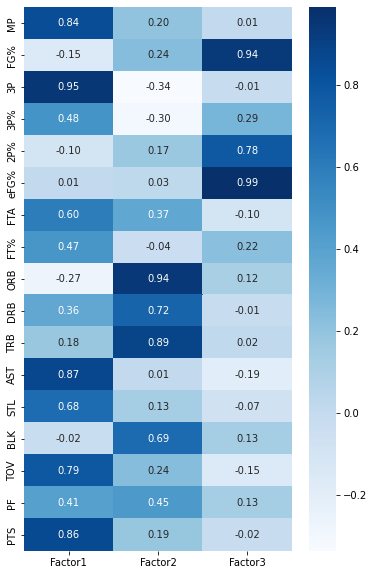

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_ob3_result_loading, cmap="Blues", annot=True, fmt='.2f')

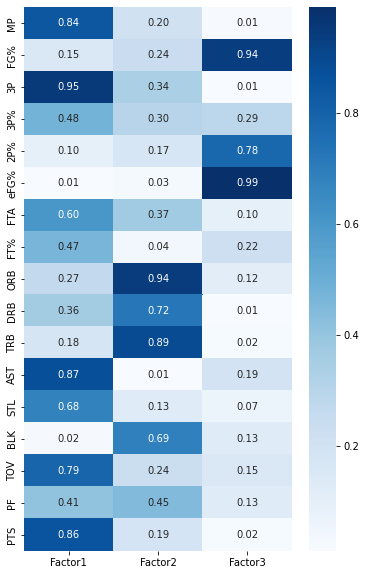

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob3_result_loading), cmap="Blues", annot=True, fmt='.2f')

In [ ]:
# Oblique
df_obli3 = np.abs(fa_ob3_result_loading)
obli3 = wrap(relationalFactor(df_obli3, 3))
obli3

,Related Feature 1,Related Feature 2,Related Feature 3,Related Feature 4,Related Feature 5,Related Feature 6,Related Feature 7
Factor1,MP,3P,FTA,AST,STL,TOV,PTS
Factor2,ORB,DRB,TRB,BLK,None,None,None
Factor3,FG%,2P%,eFG%,None,None,None,None


요인의 개수를 3개로 지정하여 FA를 진행한 경우,

한 요인에 너무 많은 특성들이 겹쳐 실제 농구 경기 상황을 잘 반영할 수 있는 Factor가 되지 못한다고 판단하였다.

따라서 요인의 개수를 1개 늘려 4개로 진행해보았다.

### FA 개수 선택 : 4인 경우에 대해 진행

앞서 PCA에서 4개의 PC변수가 적절하다는 결과가 등장했기 때문에 요인 역시 4개로 가정하고 분석을 진행해본다.

In [ ]:
fa_ob4 = FactorAnalyzer(n_factors=4, rotation = "promax")
fa_ob4.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [ ]:
fa_ob4_result_loading = pd.DataFrame(fa_ob4.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'],
                                 index=data_scale.columns)
fa_ob4_result_loading

,Factor1,Factor2,Factor3,Factor4
MP,0.512794,0.244458,-0.054158,0.385945
FG%,0.057297,0.039715,0.996654,-0.077795
3P,0.361944,-0.216460,-0.156200,0.734855
3P%,-0.177571,-0.099466,0.050698,0.798390
2P%,0.108271,-0.016073,0.847022,-0.083959
eFG%,-0.108724,-0.023044,0.895787,0.292725
FTA,0.700935,0.231261,0.005162,-0.081843
FT%,0.062059,0.073339,0.081330,0.485786
ORB,-0.221305,1.038333,0.017639,-0.188339
DRB,0.315380,0.738575,-0.047483,-0.009633


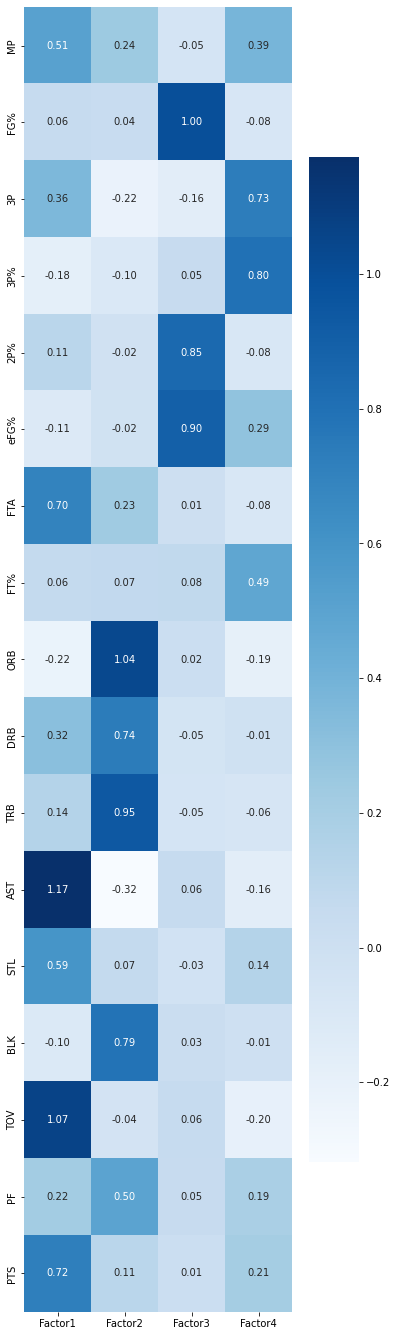

In [ ]:
# 시각화
plt.figure(figsize=(6,24))
sns.heatmap(fa_ob4_result_loading, cmap="Blues", annot=True, fmt='.2f')

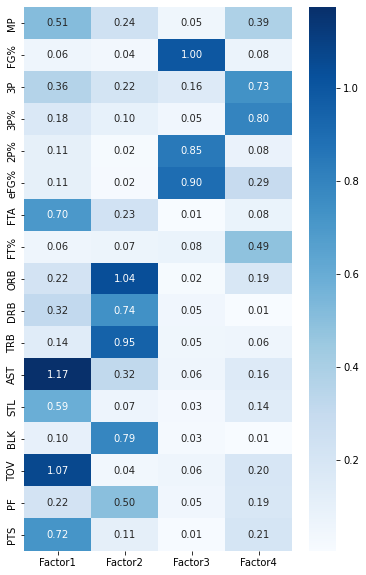

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob4_result_loading), cmap="Blues", annot=True, fmt='.2f')

In [ ]:
# Oblique
df_obli4 = np.abs(fa_ob4_result_loading)
obli4 = wrap(relationalFactor(df_obli4, 4))
obli4

,Related Feature 1,Related Feature 2,Related Feature 3,Related Feature 4,Related Feature 5,Related Feature 6
Factor1,MP,FTA,AST,STL,TOV,PTS
Factor2,ORB,DRB,TRB,BLK,None,None
Factor3,FG%,2P%,eFG%,None,None,None
Factor4,3P,3P%,None,None,None,None


요인 4개로 분석을 실행한 경우,

- Factor1 : Assist stat
      (Assist > TOV > PTS > FTA > STL > MP) >= 0.5
    - Assist 다음으로 높게 등장한 TOV 변수가 높게 나온 이유는 어시스트를 많이 하기 위해서는 기본적인 패스 시도가 많아야 하고, 이 과정에서 Turn OVer(공격권이 상대팀으로 넘어감) 되는 상황이 많이 나올 수 있다는 것으로 해석해볼 수 있다.

- Factor2 : Defense stat
      (ORB > TRB > BLK > DRB > PF) >= 0.5
    - Factor2에 대해 factor loadings 값이 높게 등장한 변수들의 경우 모두 수비와 관련된 지표에 해당한다. 상대적으로 골대 밑 페인트존에서 몸싸움을 많이하고, 소유권 다툼이 잦은 센터(농구의 포지션)와 같은 선수들에게서 리바운드, 블록, 파울이 많이 발생하게 된다.

- Factor3 : Scoring stat (2pt)
      (FG% > eFG% > 2P%) >= 0.5
    - Factor3에 factor loadings 값이 높게 등장한 변수들의 경우, FG%(자유투를 제외한 필드골(2점 혹은 3점)의 성공률), eFG%(FG%를 보정한 수치로, 3점슛에 가중치를 둔 필드골 성공률), 2P%(필드골 중 2점 득점 성공률)이 해당되었다. 비록 FG%와 eFG%에 3점슛의 비율이 포함되기는 하지만, 농구에서 필드골의 대부분은 2점슛이 차지하고, Factor4에 3점슛 관련 지표가 분리되었기 때문에 Factor3를 필드골 성공 관련 지표 중에서도 2점과 관련이 높은 지표로 해석하였다.

- Factor4 : Scoring stat (3pt)
      (3P% > 3P) >= 0.5
    - Factor4에 factor loadings 값이 높게 등장한 변수들의 경우 모두 3점슛 성공률과 3점슛 득점수였다. 이는 주로 외곽에서 플레이하는 포인트가드 혹은 슈팅가드 포지션의 선수들에게서 주로 높게 나타나는 특징이다.
    - 추가적으로 자유투 성공률 FT% 역시 0.5에 근접한 0.49로 나타났는데, 이는 일반적으로 3점슛 성공률이 높은 선수의 개인 기량이 높기 때문에 자유투 성공률 역시 높게 나타나는 것으로 해석해볼 수 있다. 다만 선수들의 기본 기량이 높은 NBA에서 자유투 성공률은 선수들 간의 그 차이가 미미하다고 판단되어 특별히 3점슛 성공 역량과 자유투 성공률이 함께 고려되는 공통요인은 아니라고 결론내렸다.


### FA 개수 선택 : 5인 경우

In [ ]:
fa_ob5 = FactorAnalyzer(n_factors=5, rotation = "promax")
fa_ob5.fit(data_scale)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [ ]:
fa_ob5_result_loading = pd.DataFrame(fa_ob5.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4','Factor5'],
                                 index=data_scale.columns)
fa_ob5_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5
MP,0.497584,0.265480,-0.056505,0.380211,-0.115999
FG%,0.062755,0.038473,0.997707,-0.078864,0.030588
3P,0.312531,-0.210293,-0.158862,0.775788,0.018070
3P%,-0.203101,-0.100613,0.052554,0.812093,-0.010448
2P%,0.121354,-0.014337,0.847257,-0.093842,-0.014306
eFG%,-0.112379,-0.025754,0.897635,0.295681,0.016488
FTA,0.647757,0.220262,0.010821,-0.012417,0.316046
FT%,0.039302,0.075684,0.083450,0.497178,0.002591
ORB,-0.240256,1.050509,0.019265,-0.194437,0.017500
DRB,0.266762,0.754411,-0.048165,0.017403,0.067570


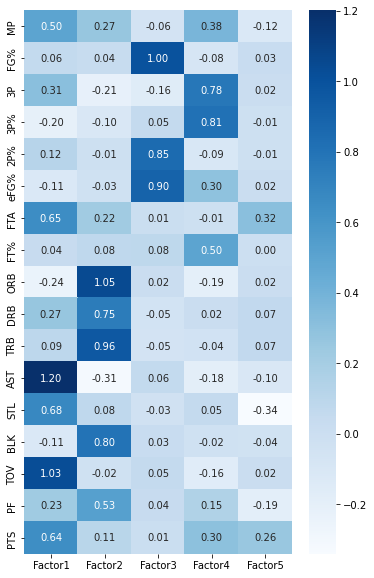

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_ob5_result_loading, cmap="Blues", annot=True, fmt='.2f')

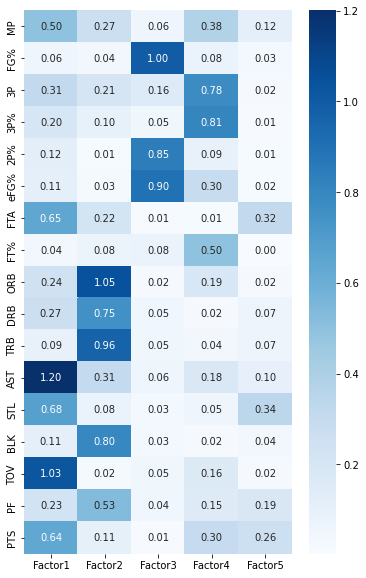

In [ ]:
# 시각화(절댓값)
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_ob5_result_loading), cmap="Blues", annot=True, fmt='.2f')

In [ ]:
# Oblique
df_obli5 = np.abs(fa_ob5_result_loading)
obli5 = wrap(relationalFactor(df_obli5, 5))
obli5

,Related Feature 1,Related Feature 2,Related Feature 3,Related Feature 4,Related Feature 5
Factor1,FTA,AST,STL,TOV,PTS
Factor2,ORB,DRB,TRB,BLK,PF
Factor3,FG%,2P%,eFG%,None,None
Factor4,3P,3P%,None,None,None
Factor5,None,None,None,None,None


요인 5개로 분석을 진행한 경우에는 Factor5에 대한 factor loadings 값이 높게 등장하는 변수가 특별히 없었기 때문에 요인 5개는 적절하지 않은 경우로 판단했다.

따라서 종합적으로 고려하였을 때 위의 요인 4개가 전반적인 데이터셋에 영향을 미친다고 판단해볼 수 있었다.

## Results & Clustering Dataset 준비

누적 분산 설명 비율을 확인해보면 4개의 요인으로 약 75%를 설명하는 준수한 상태임을 확인해볼 수 있다.

In [ ]:
fa_ob4.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa_ob4.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4
SS Loadings,4.559439,3.688072,2.565984,1.868863
Proportion Var,0.268202,0.216945,0.150940,0.109933
Cumulative Var,0.268202,0.485148,0.636088,0.746021


따라서 4개의 요인에 대한 데이터셋 `X_ff`을 나타내면 아래와 같다.

In [ ]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:4], 
                    columns = ['Assist','Defense','2pt_scoring','3pt_scoring'], 
                    index = data_scale.index)
X_ff

,Assist,Defense,2pt_scoring,3pt_scoring
0,0.614591,0.592471,-1.400127,1.259159
1,1.380974,1.799665,-3.227418,0.661653
2,2.140680,0.499157,-2.560623,-0.941302
3,-0.738709,0.483954,-0.501423,-0.369578
4,0.610233,0.978842,-0.595724,0.348298
...,...,...,...,...
779,0.164684,0.415779,-0.513004,0.839357
780,2.067148,-2.589555,1.136778,-2.905051
781,0.041644,1.290957,-0.946830,-0.351265
782,0.050418,1.486813,-0.945192,-0.554127


따라서 `X_ff`를 이용해서 아래의 군집분석을 진행해보고자 한다.

# Clustering (군집분석)

- Unsupervised Learning: Y label이 없는 데이터에서 패턴을 찾는 방법
- Clustering: 거리가 가까운 관측치들 간 유사한 특징이 있을 것이라는 가정을 기반으로 변수들을 군집화
  - 정답이 없으므로 탐색 인사이트 용도로 사용
  - 대부분 optimization 문제를 푸는 경우가 많음
  - 1) 계층적 클러스터링 (hierarchical clustering)과 2) 비계층적 클러스터링(K-means clustering)으로 구분됨
    - 1) 거리행렬을 기반으로 가까운 대상끼리 순차적으로 그룹을 할당
    - 2) 랜덤한 시작점에서 해당 점과 가까운 대상 간 그룹 할당

- 이상치가 존재할 경우 클러스터링 진행 시 영향을 많이 받을 수 있으므로 사전에 제거 과정이 필요

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd 
data = X_ff

In [ ]:
from IPython.display import display
display(data.head())
print('\n', data.shape)

,Assist,Defense,2pt_scoring,3pt_scoring
0,0.614591,0.592471,-1.400127,1.259159
1,1.380974,1.799665,-3.227418,0.661653
2,2.140680,0.499157,-2.560623,-0.941302
3,-0.738709,0.483954,-0.501423,-0.369578
4,0.610233,0.978842,-0.595724,0.348298



 (784, 4)


In [ ]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
for col in data.columns:
    outlier_idx = get_outlier(df=data, column=col, weight=1.5)
    data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
display(data.head())
print('\n', data.shape)

,Assist,Defense,2pt_scoring,3pt_scoring
0,0.614591,0.592471,-1.400127,1.259159
3,-0.738709,0.483954,-0.501423,-0.369578
4,0.610233,0.978842,-0.595724,0.348298
5,0.296274,-0.784838,0.398670,0.120894
6,0.493155,-0.903201,0.361143,0.157453



 (747, 4)


- large scale 데이터를 사용할 경우 계산량이 많아지며, 클러스터링 시 값의 range의 영향을 받기 때문에 표준화/scaling이 필요

In [ ]:
data.describe() # 기초통계량

,Assist,Defense,2pt_scoring,3pt_scoring
count,747.000000,747.000000,747.000000,747.000000
mean,-0.043445,-0.042958,0.024852,0.069777
std,0.945110,0.912460,0.903627,0.828576
min,-2.073403,-2.296506,-2.456774,-2.126304
25%,-0.686951,-0.628858,-0.555391,-0.470922
50%,-0.062430,-0.035747,0.149797,0.115504
75%,0.555924,0.562799,0.683885,0.653400
max,2.543742,2.376962,2.447513,2.344168


In [ ]:
from sklearn.preprocessing import StandardScaler # 정규분포
scaled = StandardScaler().fit_transform(data)

In [ ]:
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.describe() # 기초통계량

,Assist,Defense,2pt_scoring,3pt_scoring
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02
mean,5.944969e-18,-2.972485e-17,-1.545692e-17,-1.746335e-18
std,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00
min,-2.149294e+00,-2.471404e+00,-2.748135e+00,-2.652205e+00
25%,-6.813362e-01,-6.425407e-01,-6.425572e-01,-6.530020e-01
50%,-2.010164e-02,7.907849e-03,1.383626e-01,5.522356e-02
75%,6.346045e-01,6.643170e-01,7.298072e-01,7.048410e-01
max,2.739281e+00,2.653858e+00,2.682836e+00,2.746779e+00


# 계층적 클러스터링 (Hierarchical Clustering)



data_prime 객체를 scaled 데이터를 deepcopy하여 만든 후에 이를 아래의 각 클러스터 linkage 방식에 활용해보자.

In [ ]:
data_prime = scaled.copy()

## 클러스터링 방식

linkage의 활용은 scipy에서 제공하는 아래의 다섯 가지 방식에 대해 시도해보았다.

`complete`, `ward`, `average`, `weighted`, `median`

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

clusters1 = linkage(y=data_prime, method='complete', metric='euclidean')
clusters2 = linkage(y=data_prime, method='ward', metric='euclidean')
clusters3 = linkage(y=data_prime, method='average', metric='euclidean')
clusters4 = linkage(y=data_prime, method='weighted', metric='euclidean')
clusters6 = linkage(y=data_prime, method='median', metric='euclidean')

아래는 이후 등장하는 다섯 가지 linkage 방식에 대한 plot을 효과적으로 그리기 위해 정의한 함수이다.

In [ ]:
# Assist / Defense / 2pt_scoring / 3pt_scoring / hc_cluster

def plot_2D(df):
    cluster_g = df.groupby('hc_cluster')
    plt.scatter(x=df['Assist'], y=df['Defense'], c=df['hc_cluster']) # 각 cluster 좌푯값 시각화

    hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
    plt.scatter(x=hc_centers[:,1], y=hc_centers[:,4], marker='D', c='r') # 각 cluster별 centroid 시각화
    # marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
    plt.xlabel('Assist')
    plt.ylabel('Defense')
    plt.show()

def plot_3D(df):
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection = '3d')

    ax.scatter(df['Assist'], df['Defense'], df['2pt_scoring'], s=5, c = df['hc_cluster'])
    ax.set_xlabel('Assist', rotation=150)
    ax.set_ylabel('Defense')
    ax.set_zlabel(r'2pt_scoring', rotation=60)
    plt.show()

## 1. complete method

임의의 두 클러스터의 유사성은 각 클러스터 내의 가장 비슷하지 않을 것 같은 데이터 쌍의 유사성과 같다는 maximum distance를 기반으로 하는 방법이다.

가까운 데이터 끼리의 거리를 사용하는 single linkage의 경우보다 좀 더 밀도있는 군집을 만드는 경향이 있다. 

### Dendrogram Visualization

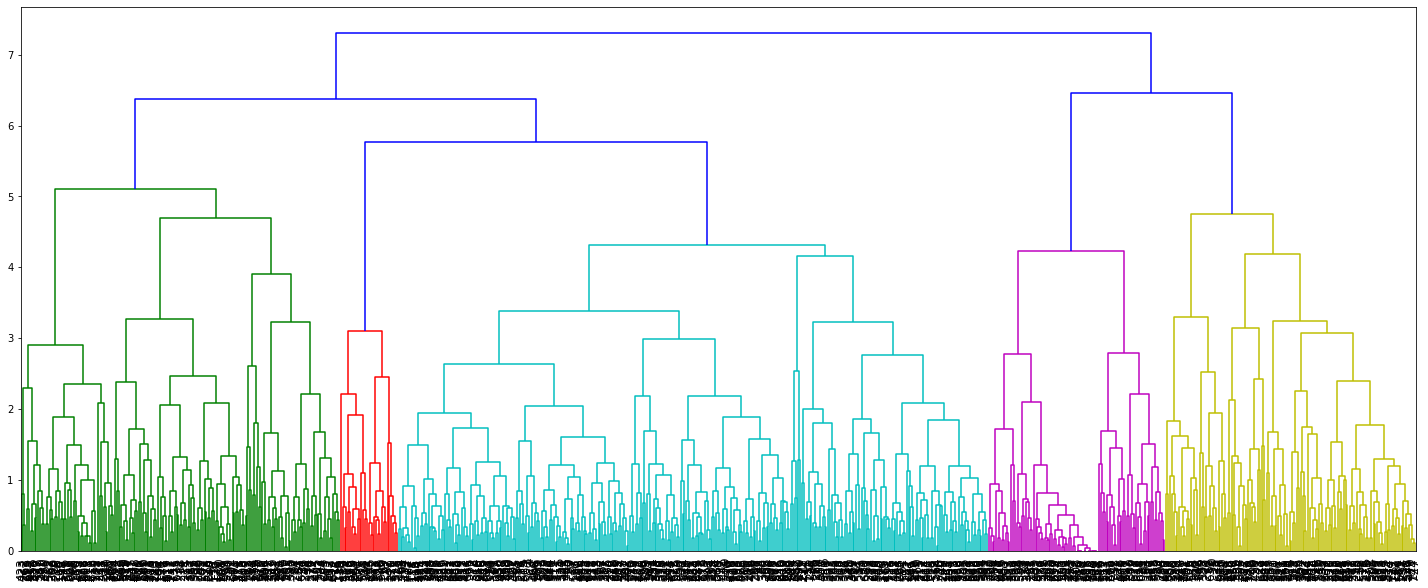

In [ ]:
# method: complete

plt.figure( figsize = (25, 10) )
dendrogram(clusters1, leaf_rotation=90, leaf_font_size=12,)
plt.show()

### Number of Clusters 

In [ ]:
cut_tree1 = fcluster(clusters1, t=5.2, criterion='distance')

pd.Series(cut_tree1).value_counts()

3    316
1    171
5    134
4     95
2     31
dtype: int64

### Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples1 = silhouette_samples(data_prime, cut_tree1) # cut tree를 지정
print('Silhouette Score:', score_samples1[:5], '\nSilhouette Score shape:', score_samples1.shape, '\n')

average_score1 = silhouette_score(data_prime, cut_tree1)

print('Silhouette Average Score:{0:.3f}'.format(average_score1))

Silhouette Score: [ 0.38765644 -0.13009499  0.3614471   0.24408437  0.17732416] 
Silhouette Score shape: (747,) 

Silhouette Average Score:0.236


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

Silhouette Average Score가 0.236 < 0.25로 위의 분류 기준에 따르면 "No substantial structure has been found"에 해당한다. 때문에 'weak cluster'라고 표현할 수 있을 것이다.

Silhouette Average Score가 낮게 나타나지만,
complete method를 이용해 나타나는 군집의 특성을 파악하고자 해석을 진행해보았다.

In [ ]:
data_prime1 = data_prime.copy()

data_prime1['hc_cluster'] = cut_tree1
data_prime1['silhouette_coeff'] = score_samples1

# 군집별 평균 silhouette_score 값 (각 군집 별)
print(data_prime1.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime1.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.021428
2    0.413786
3    0.302519
4    0.381477
5    0.206851
Name: silhouette_coeff, dtype: float64
표준편차: 0.15797184277037854


### EDA/Interpretation

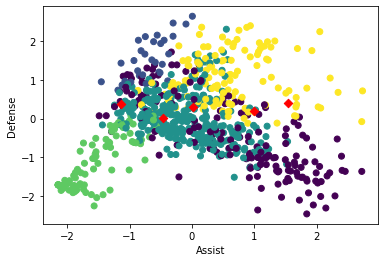

In [ ]:
plot_2D(data_prime1)

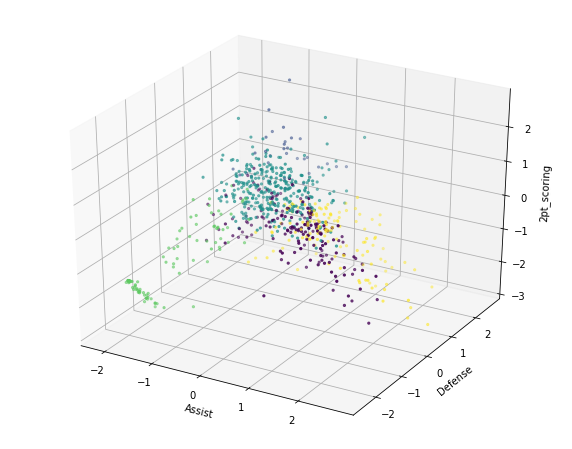

In [ ]:
plot_3D(data_prime1)

In [ ]:
cluster_g1 = data_prime1.groupby('hc_cluster')
cluster_g1.mean()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.660454,-0.469053,0.024952,-0.988895,0.021428
2,-0.687734,1.536013,0.827550,-1.437001,0.413786
3,-0.084202,0.020123,0.684950,0.425247,0.302519
4,-1.540227,-1.138516,-1.227573,0.063366,0.381477
5,0.606803,1.002924,-0.968251,0.546644,0.206851


Complete method를 이용한 군집 분석에서는 군집의 개수가 5일 때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.
1. 어시스트가 높고 2점 득점성공률은 준수하며, 디펜스능력과와 3점 득점성공률이 낮다. 
2. 어시스트와 3점 득점 성공률이 낮은 반면 디펜스와 2점 득점성공률이 높다.
3. 어시스트 능력과 수비 능력은 평범하지만, 2점과 3점 득점성공률이 높다. 
4. 부진한 선수
5. 어시스트가 높고 디펜스가 특히 높다. 3점슛 성공률은 평균 이상임에 비해 2점 득점 성공률은 낮다.

In [ ]:
cluster_g1.std()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,1.038540,0.964223,0.703533,0.757169,0.240740
2,0.326551,0.544786,0.681042,0.774638,0.176822
3,0.583209,0.598970,0.503733,0.713458,0.162248
4,0.475616,0.671511,0.800672,0.707813,0.320546
5,0.703578,0.647899,0.727421,0.846471,0.172891


## 2. ward method

거리가 아닌, 군집 내 오차 제곱합(within group sum of squares)이 최소가 되도록 최소가 되도록 군집화하는 방식으로 Minimum Variance Method라고도 불린다.
$$SSE=\sum^K_{i=1}SSE_i=\sum^{K}_{i=1}\sum^{n_i}_{j=1}\sum^{m}_{k=1}(x_{ijk}-\bar{x}_{ik})^2$$

와드의 방법 역시 다른 linkage 방식과 마찬가지로 computationally intensive하지만 다른 방법에 비해 적은 계산과정을 거친다. 이러한 점의 단점으로는 최적의 클러스터보다 더 적은 결과를 보여준다는 점이 있고, 실제로 이번 실습 과정에서 실루엣 평균 계수가 최대치가 나오는 클러스터 분류로는 2라는 가장 작은 군집의 수가 도출된 점이 특징적이었다.


### Dendrogram Visualization

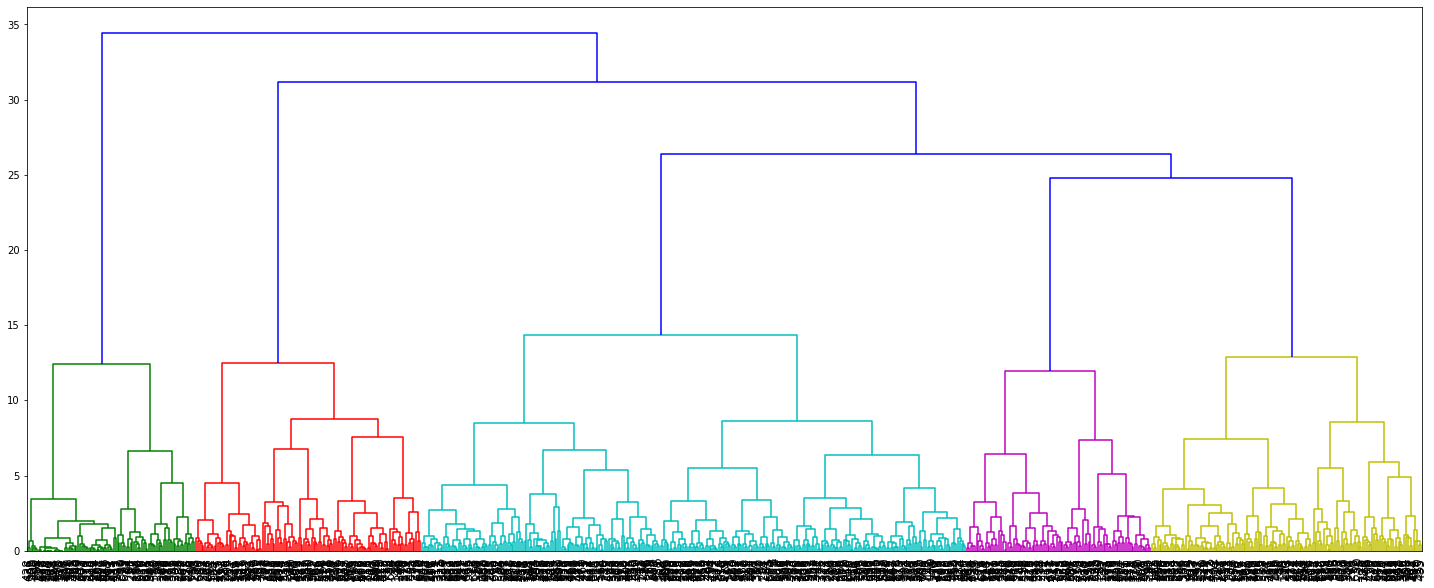

In [ ]:
# # method: ward

plt.figure( figsize = (25, 10) )
dendrogram(clusters2, leaf_rotation=90, leaf_font_size=12,)
plt.show()

### Number of Clusters

In [ ]:
cut_tree2 = fcluster(clusters2, t=32.5, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능
# cut_tree2 = fcluster(clusters2, t=20, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능

pd.Series(cut_tree2).value_counts() # 클러스터링 결과

2    657
1     90
dtype: int64

### Evaluation

In [ ]:
score_samples2 = silhouette_samples(data_prime, cut_tree2) # cut tree를 지정
print('Silhouette Score:', score_samples2[:5], '\nSilhouette Score shape:', score_samples2.shape, '\n')

average_score2 = silhouette_score(data_prime, cut_tree2)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score2))

Silhouette Score: [0.19920392 0.03222486 0.36601743 0.33209977 0.32927058] 
Silhouette Score shape: (747,) 

Silhouette Average Score:0.311


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

Silhouette Average Score가 0.311 > 0.25로 위의 분류 기준에 따르면 "The structure is weak and could be artificial"에 해당한다.

Silhouette Average Score가 높지는 않았지만 
ward method를 이용해 나타나는 군집의 특성을 파악하고자 해석을 진행해보았다.

In [ ]:
data_prime2 = data_prime.copy()

data_prime2['hc_cluster'] = cut_tree2
data_prime2['silhouette_coeff'] = score_samples2

# 군집별 평균 silhouette_score 값 (각 군집 별)
print(data_prime2.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime2.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.507847
2    0.284252
Name: silhouette_coeff, dtype: float64
표준편차: 0.1581056001725382


### EDA/Interpretation

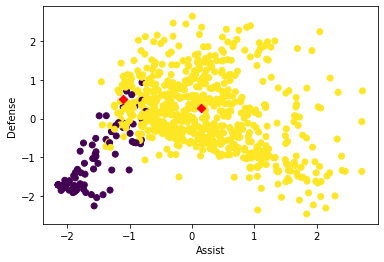

In [ ]:
plot_2D(data_prime2)

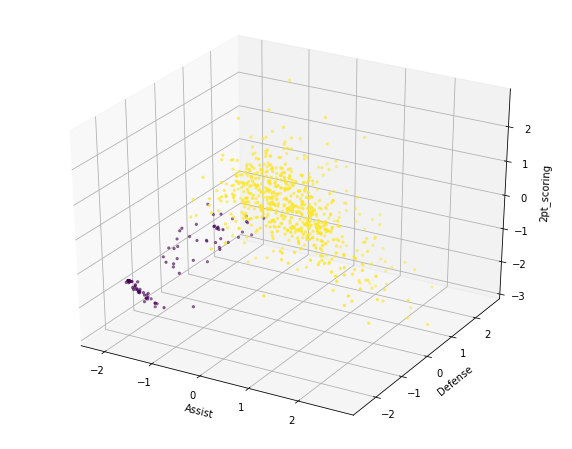

In [ ]:
plot_3D(data_prime2)

In [ ]:
cluster_g2 = data_prime2.groupby('hc_cluster')
cluster_g2.mean()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,-1.588406,-1.107821,-1.393010,-0.321035,0.507847
2,0.217590,0.151756,0.190823,0.043977,0.284252


Ward method를 이용한 군집 분석에서는 군집의 개수가 2일 때 silhouette coefficient의 평균이 최대로 나타났다.

단순히 요약하여 평균적인 폼을 보여주는 플레이어와 부진했던 선수로 요약할 수 있다.

다만 실제로 어느 스포츠든 경기력이 좋은 집단과 안좋은 집단이 존재한다는 점은 당연하므로, 두 개의 군집으로 분류하는 것은 큰 의미를 갖지 못할 수 있다.

In [ ]:
cluster_g2.std()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.434745,0.779157,0.606758,0.631889,0.204260
2,0.848240,0.930008,0.886611,1.033669,0.122586


## 3. average method

Average-linkage 방식의 경우 각 군집의 관측값 쌍 사이의 거리를 모두 더하고
쌍의 수로 나누어 구한 평균 군집간 거리를 구하는 방식으로

계층적 클러스터링에서 가장 널리 사용되는 방법 중 하나이다.

### Dendrogram Visualization

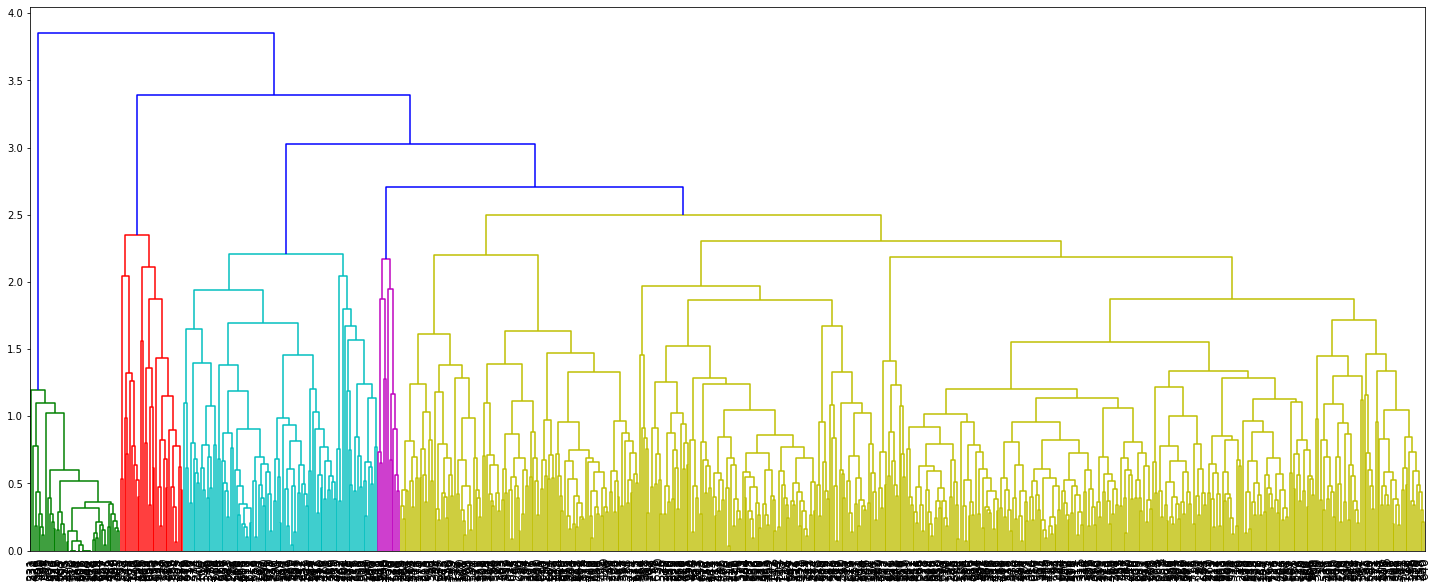

In [ ]:
# method: average

plt.figure( figsize = (25, 10) )
dendrogram(clusters3, leaf_rotation=90, leaf_font_size=12,)
plt.show()

### Number of Clusters

In [ ]:
cut_tree3 = fcluster(clusters3, t=3.1, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능

pd.Series(cut_tree3).value_counts() # 클러스터링 결과

3    665
1     48
2     34
dtype: int64

### Evaluation

In [ ]:
score_samples3 = silhouette_samples(data_prime, cut_tree3) # cut tree를 지정
print('Silhouette Score:', score_samples3[:5], '\nSilhouette Score shape:', score_samples3.shape, '\n')

average_score3 = silhouette_score(data_prime, cut_tree3)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score3))

Silhouette Score: [-0.45545076  0.29281225 -0.13727682  0.41996757  0.38246498] 
Silhouette Score shape: (747,) 

Silhouette Average Score:0.285


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

Silhouette Average Score가 0.285 > 0.25로 위의 분류 기준에 따르면 "The structure is weak and could be artificial"에 해당한다.

Silhouette Average Score가 높지는 않았지만 
average method를 이용해 나타나는 군집의 특성을 파악하고자 해석을 진행해보았다.

In [ ]:
data_prime3 = data_prime.copy()

data_prime3['hc_cluster'] = cut_tree3
data_prime3['silhouette_coeff'] = score_samples3

# 군집별 평균 silhouette_score 값 (각 군집 별)
print(data_prime3.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime3.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.836459
2    0.438531
3    0.237113
Name: silhouette_coeff, dtype: float64
표준편차: 0.3049949035509504


### EDA/Interpretation

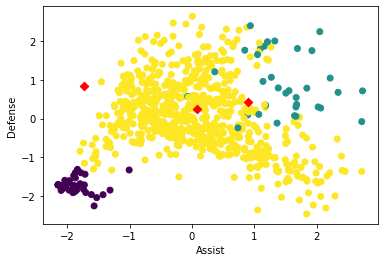

In [ ]:
plot_2D(data_prime3)

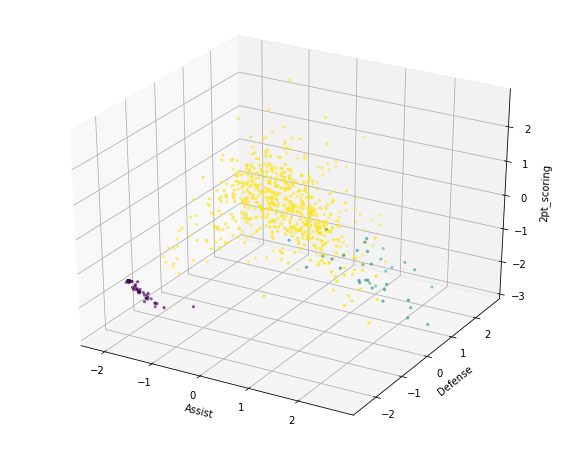

In [ ]:
plot_3D(data_prime3)

In [ ]:
cluster_g3 = data_prime3.groupby('hc_cluster')
cluster_g3.mean()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,-1.904976,-1.731233,-1.886568,-0.176802,0.836459
2,1.471850,0.901596,-1.687084,0.970730,0.438531
3,0.062250,0.078865,0.222430,-0.036870,0.237113


Average method를 이용한 군집 분석에서는 군집의 개수가 3일때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.
1. 퍼포먼스가 부진했던 선수
2. 어시스트와 디펜스가 높고 3점 슛을 잘 하는 선수 / 2점 포인트가 낮은 것으로 보아 상대방의 페인트존(골 밑의 사각형 영역)에 들어가기보다는 외곽에서 패스를 돌리며 슛을 넣는 것에 용이한 선수
3. 어시스트와 디펜스가 평이하고 비교적 2점 포인트가 높은 선수(평균적으로 플레이하는 선수) / 비교적 페인트존에서 덩크나 2점 슛 시도가 많을 것으로 보이는 선수

In [ ]:
cluster_g3.std()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.241188,0.177723,0.251996,0.353202,0.059577
2,0.606928,0.768110,0.630906,0.821296,0.099011
3,0.851725,0.910455,0.805074,1.015271,0.224891


## 4. weighted method

WPGMA로도 불리는 방식이다.

해당 알고리즘에서는 dendogram을 만들고, 가장 가까운 두 클러스터가 더 높은 level의 클러스터로 묶이는 방식이다.

### Dendrogram Visualization

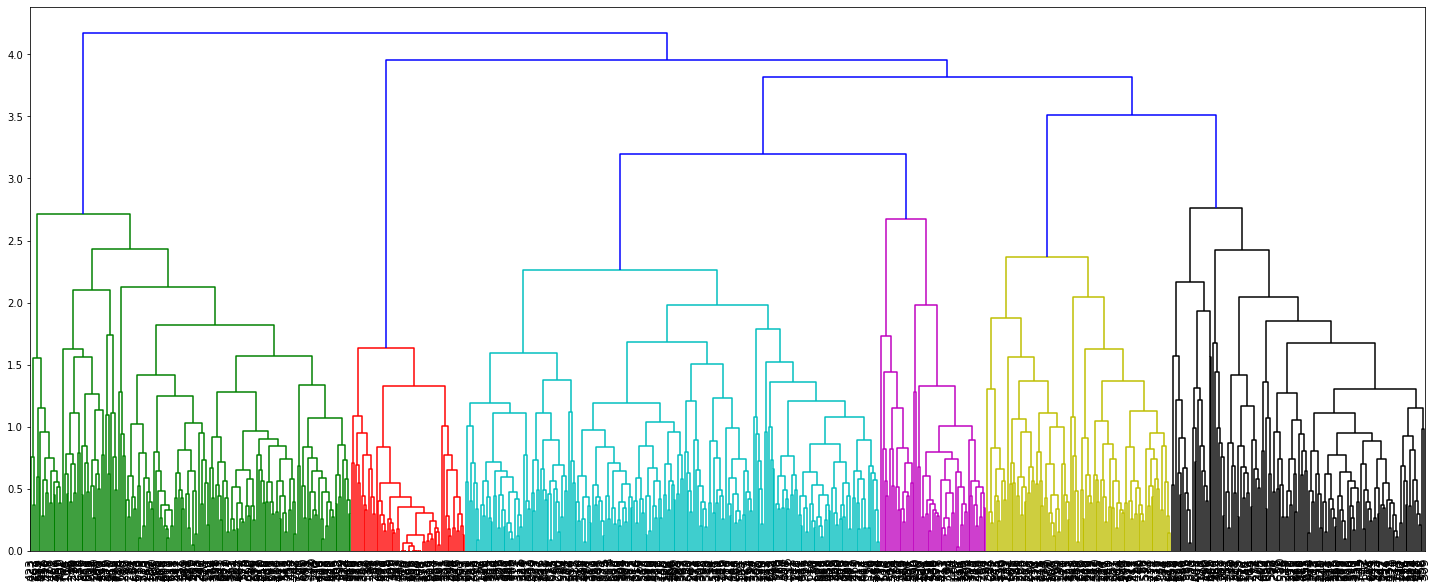

In [ ]:
# method: weighted

plt.figure( figsize = (25, 10) )
dendrogram(clusters4, leaf_rotation=90, leaf_font_size=12,)
plt.show()

### Number of Clusters

In [ ]:
# cut_tree4 = fcluster(clusters4, t=3.8, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능
cut_tree4 = fcluster(clusters4, t=3.4, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능

pd.Series(cut_tree4).value_counts() # 클러스터링 결과

3    279
1    172
5    136
4     99
2     61
dtype: int64

### Evaluation

In [ ]:
score_samples4 = silhouette_samples(data_prime, cut_tree4) # cut tree를 지정
print('Silhouette Score:', score_samples4[:5], '\nSilhouette Score shape:', score_samples4.shape, '\n')

average_score4 = silhouette_score(data_prime, cut_tree4)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score4))

Silhouette Score: [ 0.42155665  0.29305926  0.33508219  0.03229204 -0.02389251] 
Silhouette Score shape: (747,) 

Silhouette Average Score:0.244


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

Silhouette Average Score가 0.244 < 0.25로 위의 분류 기준에 따르면 "No substantial structure has been found"에 해당한다. 때문에 'weak cluster'라고 표현할 수 있을 것이다.

Silhouette Average Score가 낮게 나타나지만,
weighted method를 이용해 나타나는 군집의 특성을 파악하고자 해석을 진행해보았다.

In [ ]:
data_prime4 = data_prime.copy()

data_prime4['hc_cluster'] = cut_tree4
data_prime4['silhouette_coeff'] = score_samples4

# 군집별 평균 silhouette_score 값 (각 군집 별)
print(data_prime4.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime4.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.140029
2    0.698830
3    0.220169
4    0.261938
5    0.208870
Name: silhouette_coeff, dtype: float64
표준편차: 0.2239441920156223


### EDA/Interpretation

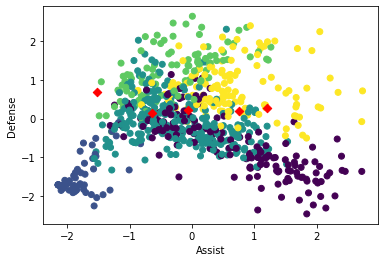

In [ ]:
plot_2D(data_prime4)

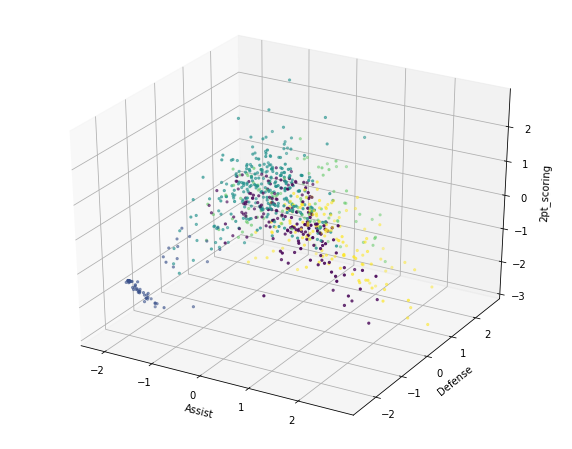

In [ ]:
plot_3D(data_prime4)

In [ ]:
cluster_g4 = data_prime4.groupby('hc_cluster')
cluster_g4.mean()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.617633,-0.648090,0.378339,-0.828968,0.140029
2,-1.813715,-1.519819,-1.704994,-0.307536,0.698830
3,-0.199505,-0.063007,0.673821,0.639885,0.220169
4,-0.292286,1.209410,-0.374618,-1.098290,0.261938
5,0.654426,0.750205,-0.823372,0.673125,0.208870


In [ ]:
cluster_g4.std()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.965476,0.769180,0.600536,0.685988,0.212641
2,0.303185,0.464840,0.436105,0.431346,0.179276
3,0.674120,0.614281,0.653152,0.696861,0.196973
4,0.652737,0.648012,0.626054,0.718290,0.168831
5,0.719651,0.615926,0.780289,0.611992,0.155762


Weighted method를 이용한 군집 분석에서는 군집의 개수가 5일때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.

1. 수비능력과 3점슛 능력은 별로이나, 어시스트와 2점슛 능력은 준수한 선수
2. 부진한 선수
3. 어시스트와 디펜스는 평균정도이고, 2점 및 3점 슛을 잘 하는 선수 
4. 어시스트와 득점력 모두 평균 이하이나, 수비적으로 뛰어난 선수
5. 어시스트,디펜스,3점슛에 능하지만, 2점슛의 경우는 평균 이하인 선수

## 5. median method

WPGMC linkage 방식으로도 불린다.

두 클러스터 간의 거리는 각 클러스터내의 관측지들 간의 거리의 중앙값에 해당한다.

### Dendrogram Visualization

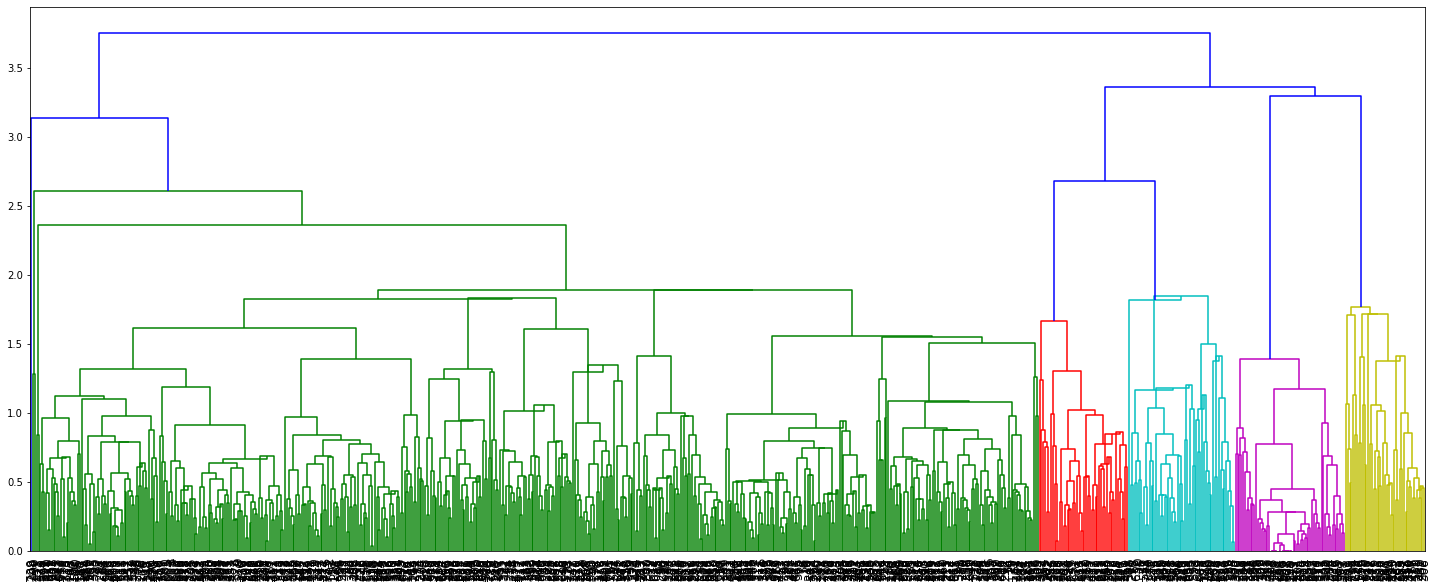

In [ ]:
# method: median

plt.figure( figsize = (25, 10) )
dendrogram(clusters6, leaf_rotation=90, leaf_font_size=12,)
plt.show()

### Number of Clusters

In [ ]:
cut_tree6 = fcluster(clusters6, t=3, criterion='distance') # 적절한 threshold를 7로 정함. # 다른 criterion도 사용 가능
pd.Series(cut_tree6).value_counts() # 클러스터링 결과

1    539
3    105
4     59
5     43
2      1
dtype: int64

### Evaluation

In [ ]:
score_samples6 = silhouette_samples(data_prime, cut_tree6) # cut tree를 지정
print('Silhouette Score:', score_samples6[:5], '\nSilhouette Score shape:', score_samples6.shape, '\n')

average_score6 = silhouette_score(data_prime, cut_tree6)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score6))

Silhouette Score: [ 0.38095265  0.17417392 -0.29647732  0.33053836  0.25191959] 
Silhouette Score shape: (747,) 

Silhouette Average Score:0.244


1. 전체 실루엣 계수(0~1)의 평균값이 1에 가까울수록 클러스터링이 잘 진행된 것  

|Range of SC|Interpretation|
|:------:|:---------------:|
|0.71-1.0|A strong structure has been found|
|0.51-0.70|A reasonable structure has been found|
|0.26-0.50|The structure is weak and could be artificial|
|< 0.25|No substantial structure has been found|

2. 개별 클러스터의 실루엣 계수 평균값의 편차가 작아야 함
  - 클러스터 내 실루엣 계수 평균값을 확인하여, 1에 가까운 클러스터를 'clear-cut cluster', 0에 가까운 클러스터를 'weak cluster'로 표현

Silhouette Average Score가 0.244 < 0.25로 위의 분류 기준에 따르면 "No substantial structure has been found"에 해당한다. 때문에 'weak cluster'라고 표현할 수 있을 것이다.

Silhouette Average Score가 낮게 나타나지만,
median method를 이용해 나타나는 군집의 특성을 파악하고자 해석을 진행해보았다.

In [ ]:
data_prime6 = data_prime.copy()

data_prime6['hc_cluster'] = cut_tree6
data_prime6['silhouette_coeff'] = score_samples6

# 군집별 평균 silhouette_score 값 (각 군집 별)
print(data_prime6.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime6.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.170789
2    0.000000
3    0.262518
4    0.724186
5    0.462829
Name: silhouette_coeff, dtype: float64
표준편차: 0.2791289835521898


### EDA/Interpretation

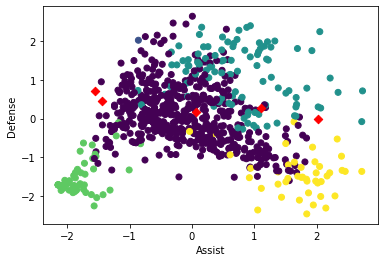

In [ ]:
plot_2D(data_prime6)

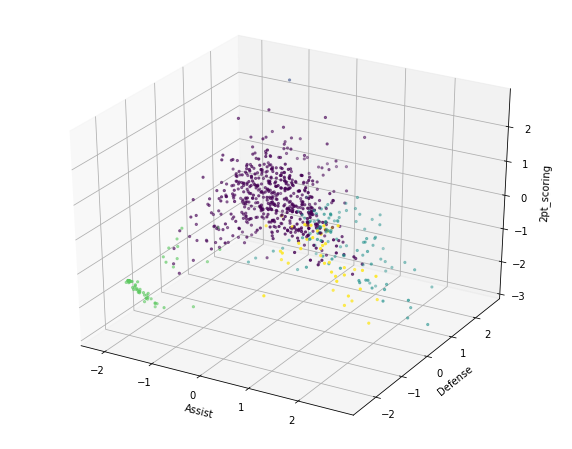

In [ ]:
plot_3D(data_prime6)

In [ ]:
cluster_g6 = data_prime6.groupby('hc_cluster')
cluster_g6.mean()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,-0.083255,0.066207,0.398928,0.061047,0.170789
2,-0.860943,2.031740,2.682836,-1.094099,0.000000
3,0.758886,1.106584,-1.156648,0.504221,0.262518
4,-1.827157,-1.557061,-1.731754,-0.278436,0.724186
5,1.717554,-1.442838,0.137586,-1.588974,0.462829


Median method를 이용한 군집 분석에서는 군집의 개수가 5일때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.

1. 2점슛 능력이 평균 이상이고, 나머지 능력은 평균치에 비슷한 선수
2. 어시스트와 3점 슛에는 약점이 있지만, 디펜스와 2점 슛이 매우 뛰어난 선수
3. 어시스트와 디펜스에 강점을 가지고, 3점슛 능력도 준수하지만 2점 슛능력이 평균에 못미치는 선수
4. 부진한 선수
5. 어시스트를 잘 하고, 2점도 준수하나 나머지에서 약점이 있는 선수

In [ ]:
cluster_g6.std()

,Assist,Defense,2pt_scoring,3pt_scoring,silhouette_coeff
hc_cluster,,,,,
1,0.728646,0.749350,0.670203,0.938532,0.231789
2,NaN,NaN,NaN,NaN,NaN
3,0.720525,0.723347,0.704852,0.980279,0.144495
4,0.298188,0.424509,0.417522,0.406395,0.159346
5,0.565773,0.543501,0.877816,0.699432,0.140735


## Results

공통적으로 세 가지의 linkage 방식에서 5개의 클러스터로 분류하는 것이 가장 적합하다고 도출되었고, 그 중에서 silhouette average score가 높은 상위의 두 method에 대해서 해석을 진행해보려고 한다.

[Silhouette Average Scores]
- Complete method : .236
- Weighted method : .244
- Median method   : .244

이므로 Complete method를 제외한 Weighted method와 Median method의 Cluster별 특징에 대해서 정리해보자면 아래와 같다.

Weighted method를 이용한 군집 분석에서는 군집의 개수가 5일때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.

1. 수비능력과 3점슛 능력은 별로이나, 어시스트와 2점슛 능력은 준수한 선수
2. 부진한 선수
3. 어시스트와 디펜스는 평균정도이고, 2점 및 3점 슛을 잘 하는 선수 
4. 어시스트와 득점력 모두 평균 이하이나, 수비적으로 뛰어난 선수
5. 어시스트,디펜스,3점슛에 능하지만, 2점슛의 경우는 평균 이하인 선수

Median method를 이용한 군집 분석에서는 군집의 개수가 5일때 silhouette coefficient의 평균이 최대로 나타났다. 각각의 군집 특성은 다음과 같다.

1. 2점슛 능력이 평균 이상이고, 나머지 능력은 평균치에 비슷한 선수
2. 어시스트와 3점 슛에는 약점이 있지만, 디펜스와 2점 슛이 매우 뛰어난 선수
3. 어시스트와 디펜스에 강점을 가지고, 3점슛 능력도 준수하지만 2점 슛능력이 평균에 못미치는 선수
4. 부진한 선수
5. 어시스트를 잘 하고, 2점도 준수하나 나머지에서 약점이 있는 선수

Weighted method의 군집분류에 대해 시각화를 해보면 아래와 같다.

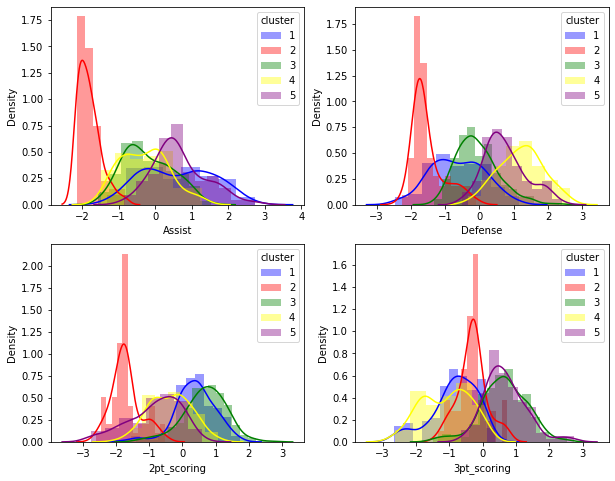

In [ ]:
# data_prime4
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

feat_names = ['Assist','Defense','2pt_scoring','3pt_scoring']

for i in range(len(feat_names)):
  plt.subplot(2,2,i+1) 
  sns.distplot(data_prime4[data_prime4.hc_cluster == 1][feat_names[i]], 
             color="blue", label=1)
  sns.distplot(data_prime4[data_prime4.hc_cluster == 2][feat_names[i]], 
             color="red", label=2)
  sns.distplot(data_prime4[data_prime4.hc_cluster == 3][feat_names[i]], 
             color="green", label=3)
  sns.distplot(data_prime4[data_prime4.hc_cluster == 4][feat_names[i]], 
             color="yellow", label=4)
  sns.distplot(data_prime4[data_prime4.hc_cluster == 5][feat_names[i]], 
             color="purple", label=5)
  plt.legend(title="cluster")

plt.show()

Median method의 군집분류에 대해 시각화를 해보면 아래와 같다.

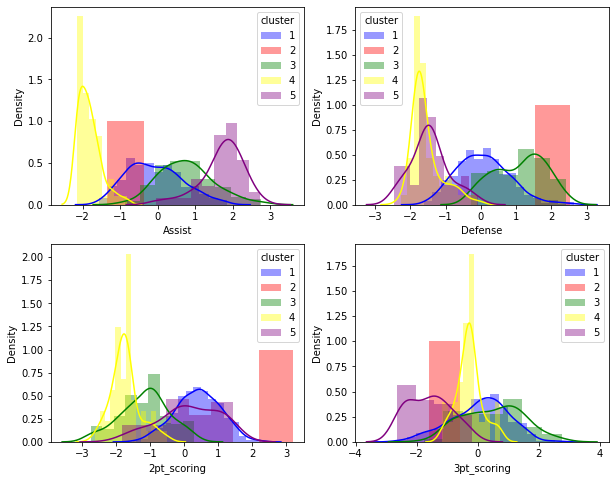

In [ ]:
# data_prime6
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

feat_names = ['Assist','Defense','2pt_scoring','3pt_scoring']

for i in range(len(feat_names)):
  plt.subplot(2,2,i+1) 
  sns.distplot(data_prime6[data_prime6.hc_cluster == 1][feat_names[i]], 
             color="blue", label=1)
  sns.distplot(data_prime6[data_prime6.hc_cluster == 2][feat_names[i]], 
             color="red", label=2)
  sns.distplot(data_prime6[data_prime6.hc_cluster == 3][feat_names[i]], 
             color="green", label=3)
  sns.distplot(data_prime6[data_prime6.hc_cluster == 4][feat_names[i]], 
             color="yellow", label=4)
  sns.distplot(data_prime6[data_prime6.hc_cluster == 5][feat_names[i]], 
             color="purple", label=5)
  plt.legend(title="cluster")

plt.show()

# k-평균 클러스터링 (K-means Clustering)


## Step 1. K 선정
1. EDA: 데이터의 형태를 살펴보고 manually 결정  
2. Elbow method: 클러스터의 개수를 늘려가며 SSE를 계산, SSE가 줄어드는 비율이 급격히 작아지는 부분을 elbow라 설정  
3. Silhouette score : 실루엣 계수로 비교
4. Calinski Harabasz score: Variance Ratio Criterio이라고도 알려짐. between-clusters dispersion mean 과 within-cluster dispersion의 비율. 값이 높을수록 군집화가 잘 되었음을 의미

In [ ]:
display(data.head())
print('\n', data.shape)

,Assist,Defense,2pt_scoring,3pt_scoring
0,0.614591,0.592471,-1.400127,1.259159
3,-0.738709,0.483954,-0.501423,-0.369578
4,0.610233,0.978842,-0.595724,0.348298
5,0.296274,-0.784838,0.398670,0.120894
6,0.493155,-0.903201,0.361143,0.157453



 (747, 4)


In [ ]:
data.describe() # 기초통계량

,Assist,Defense,2pt_scoring,3pt_scoring
count,747.000000,747.000000,747.000000,747.000000
mean,-0.043445,-0.042958,0.024852,0.069777
std,0.945110,0.912460,0.903627,0.828576
min,-2.073403,-2.296506,-2.456774,-2.126304
25%,-0.686951,-0.628858,-0.555391,-0.470922
50%,-0.062430,-0.035747,0.149797,0.115504
75%,0.555924,0.562799,0.683885,0.653400
max,2.543742,2.376962,2.447513,2.344168


In [ ]:
data_prime7 = data.copy()

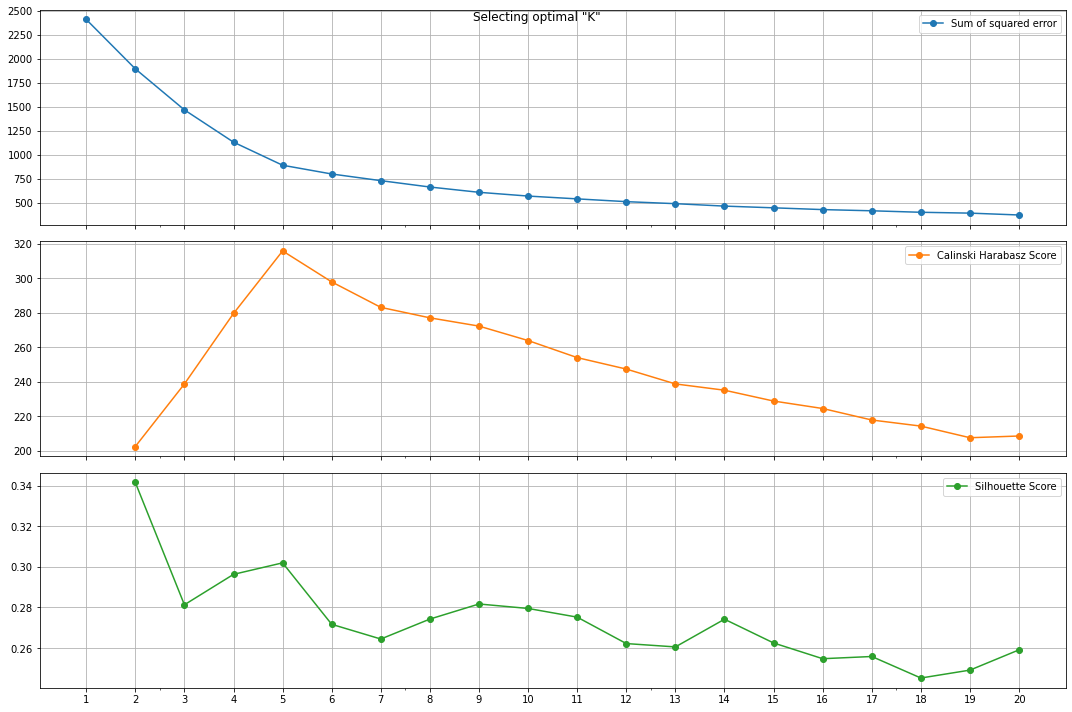

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime7)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime7)
        chs = calinski_harabasz_score(data_prime7, cluster)
        ss = silhouette_score(data_prime7, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

위의 세 그래프를 모두 고려했을 때, 

SSE 그래프에서는 5(elbow) 이후에 기울기가 완만해짐을 확인할 수 있고,

Calinski Harabasz Score 그래프에서는 K=5인 경우가 최고점으로 나타났으며,

Silhouette Score의 경우 K=2인 경우가 가장 크게 나타났지만 군집이 2인 경우는 큰 의미를 가지지 못하기 때문에 그 다음으로 큰 수치인 K=5를 고려해볼 수 있다.

위의 그래프에서 모두 공통적으로 K=5가 최선으로 등장하므로 K=5에 대해서 K-means clustering을 진행하고, 실제로 K=5의 분류가 가장 좋은 지 대조해보기 위해 K=6에 대해서도 model을 fit해보고, 그 결과를 average silhouette score를 이용해 비교해보았다. 

## K=5

## Step 2. K-means clustering

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++' : random한 init standadard를 원하면 init = random 추가
algorithm: {'auto', 'full', 'elkan'}, default='auto' : 'elkan'- triangle enequality(메모리사용량 큼), full(2^n algorithm) 
'''

model5 = KMeans(n_clusters=5, random_state=312, algorithm='auto')
model5.fit(data_prime7)

KMeans(n_clusters=5, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model5.predict(data_prime7)
pred

array([0, 2, 0, 4, 1, 4, 4, 0, 2, 2, 2, 3, 0, 2, 4, 1, 4, 4, 4, 4, 4, 4,
       3, 0, 2, 0, 0, 0, 1, 1, 0, 4, 2, 3, 1, 0, 1, 1, 2, 2, 2, 4, 4, 0,
       1, 4, 3, 2, 2, 2, 4, 4, 4, 1, 4, 0, 2, 0, 2, 1, 2, 4, 4, 2, 2, 3,
       1, 4, 0, 4, 4, 2, 2, 4, 1, 0, 1, 4, 4, 3, 1, 0, 3, 3, 3, 4, 3, 4,
       2, 1, 2, 2, 2, 4, 4, 1, 0, 2, 4, 2, 4, 2, 1, 2, 4, 4, 4, 2, 2, 3,
       4, 4, 4, 0, 1, 2, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 0, 4, 0, 0, 2, 1,
       4, 2, 3, 2, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 2, 2, 1, 1, 1, 4, 1, 0,
       2, 4, 2, 0, 3, 3, 1, 0, 0, 0, 4, 1, 1, 1, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 3, 4, 1, 4, 1, 0, 4, 0, 1, 1, 3, 1, 4, 4, 4, 4, 2, 4, 4, 2,
       0, 2, 0, 2, 0, 2, 4, 2, 4, 3, 4, 3, 2, 4, 4, 4, 2, 2, 4, 1, 4, 4,
       2, 0, 1, 0, 3, 4, 0, 0, 4, 3, 2, 3, 1, 3, 2, 0, 4, 1, 0, 1, 1, 2,
       0, 2, 3, 0, 1, 1, 1, 4, 4, 1, 1, 0, 0, 2, 2, 0, 4, 4, 4, 1, 1, 1,
       3, 4, 4, 4, 2, 0, 0, 0, 4, 4, 1, 2, 1, 0, 1, 0, 2, 4, 0, 1, 1, 3,
       2, 3, 2, 2, 0, 1, 4, 4, 1, 4, 4, 4, 4, 4, 3,

In [ ]:
# 군집별 centroids의 좌표값
centroids5 = model5.cluster_centers_
centroids5 = pd.DataFrame(centroids5, columns = data_prime7.columns)

In [ ]:
centroids5

,Assist,Defense,2pt_scoring,3pt_scoring
0,0.573335,0.903204,-0.920274,0.396212
1,1.198990,-1.075654,0.349485,-0.697164
2,-0.553744,0.479969,0.243568,-0.628779
3,-1.682651,-1.332962,-1.420110,-0.080461
4,-0.077872,-0.109837,0.628693,0.738893


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime7['k_means_cluster'] = pred
data_prime7['k_silhouette_coeff'] = silhouette_samples(data_prime7, data_prime7['k_means_cluster'])

k_average_score5 = silhouette_score(data_prime7, data_prime7['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score5))

Average Silhouette Score:0.493


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime7.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.457202
1    0.447973
2    0.437910
3    0.641288
4    0.532425
Name: k_silhouette_coeff, dtype: float64

Text(0, 0.5, 'Defense')

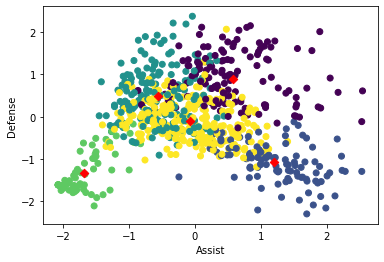

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime7['Assist'], y=data_prime7['Defense'], c=data_prime7['k_means_cluster'])
plt.scatter(x=centroids5.iloc[:,0], y=centroids5.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('Assist')
plt.ylabel('Defense')

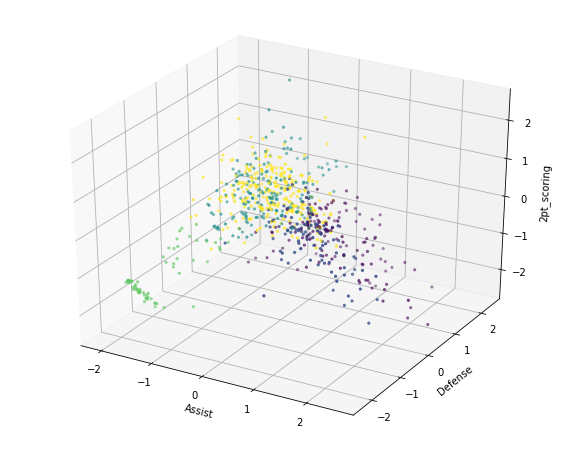

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')
# s : 점의 크기
ax.scatter(data_prime7['Assist'], data_prime7['Defense'], data_prime7['2pt_scoring'], s=5, c = data_prime7['k_means_cluster'])
ax.set_xlabel('Assist', rotation=150)
ax.set_ylabel('Defense')
ax.set_zlabel(r'2pt_scoring', rotation=60)
plt.show()

## K=6

In [ ]:
data_prime8 = data.copy()

## Step 2. K-means clustering

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++' : random한 init standadard를 원하면 init = random 추가
algorithm: {'auto', 'full', 'elkan'}, default='auto' : 'elkan'- triangle enequality(메모리사용량 큼), full(2^n algorithm) 
'''

model6 = KMeans(n_clusters=6, random_state=312, algorithm='auto')
model6.fit(data_prime8)

KMeans(n_clusters=6, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred6 = model6.predict(data_prime8)
pred6

array([4, 1, 4, 3, 3, 0, 3, 4, 1, 1, 1, 2, 4, 1, 3, 5, 3, 0, 0, 0, 0, 3,
       2, 4, 1, 4, 4, 4, 5, 3, 4, 3, 1, 2, 3, 4, 5, 3, 1, 1, 0, 3, 0, 4,
       5, 3, 2, 0, 0, 1, 0, 0, 0, 3, 3, 4, 1, 4, 0, 5, 0, 3, 3, 1, 0, 2,
       5, 0, 4, 0, 0, 1, 0, 3, 5, 4, 5, 0, 0, 2, 5, 4, 2, 2, 2, 0, 2, 3,
       1, 5, 1, 1, 1, 0, 0, 5, 4, 1, 3, 0, 3, 0, 5, 1, 3, 3, 0, 1, 1, 2,
       0, 0, 3, 4, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 4, 3, 4, 3, 4, 4, 1, 5,
       3, 1, 2, 1, 4, 4, 4, 3, 3, 4, 0, 0, 4, 3, 1, 1, 5, 3, 3, 3, 5, 4,
       1, 3, 1, 4, 2, 2, 5, 4, 4, 4, 0, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 2, 0, 3, 0, 5, 4, 3, 0, 5, 5, 2, 5, 0, 0, 0, 0, 0, 0, 0, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 3, 2, 0, 2, 0, 3, 0, 3, 1, 1, 3, 5, 0, 3,
       1, 4, 5, 0, 2, 0, 4, 4, 3, 2, 1, 2, 5, 2, 1, 0, 0, 5, 4, 5, 5, 0,
       4, 1, 2, 4, 3, 3, 5, 3, 3, 5, 5, 4, 4, 1, 0, 0, 0, 0, 0, 5, 5, 5,
       2, 3, 3, 0, 0, 4, 4, 4, 3, 3, 3, 1, 5, 4, 5, 4, 0, 0, 4, 5, 3, 2,
       0, 2, 1, 1, 4, 5, 3, 3, 5, 0, 0, 0, 0, 0, 2,

In [ ]:
# 군집별 centroids의 좌표값
centroids6 = model6.cluster_centers_
centroids6 = pd.DataFrame(centroids6, columns = data_prime8.columns)

In [ ]:
centroids6

,Assist,Defense,2pt_scoring,3pt_scoring
0,-0.461405,0.181419,0.517541,0.531123
1,-0.550608,0.536977,0.169791,-0.858081
2,-1.682651,-1.332962,-1.420110,-0.080461
3,0.499818,-0.483320,0.691170,0.653651
4,0.626370,0.906375,-0.954178,0.404010
5,1.300714,-1.180961,0.280360,-0.921564


## Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime8['k_means_cluster'] = pred6
data_prime8['k_silhouette_coeff'] = silhouette_samples(data_prime8, data_prime8['k_means_cluster'])

k_average_score6 = silhouette_score(data_prime8, data_prime8['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score6))

Average Silhouette Score:0.455


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime8.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.452226
1    0.326869
2    0.648914
3    0.522282
4    0.383517
5    0.509371
Name: k_silhouette_coeff, dtype: float64

Text(0, 0.5, 'Defense')

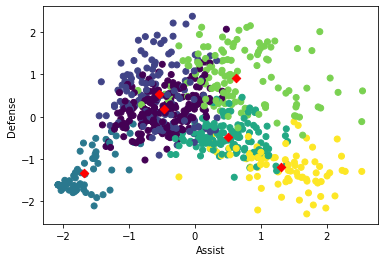

In [ ]:
# 군집결과 시각화
plt.scatter(x=data_prime8['Assist'], y=data_prime8['Defense'], c=data_prime8['k_means_cluster'])
plt.scatter(x=centroids6.iloc[:,0], y=centroids6.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('Assist')
plt.ylabel('Defense')

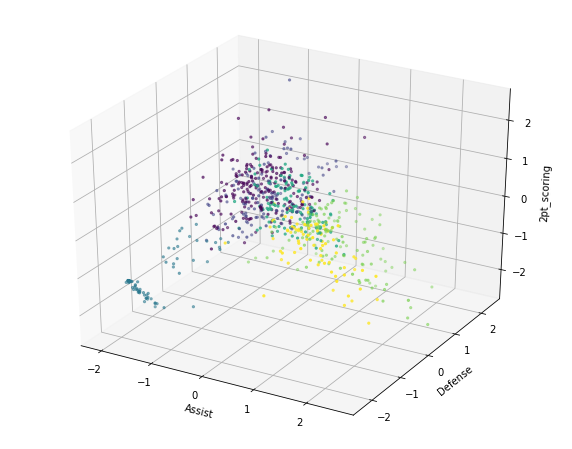

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime8['Assist'], data_prime8['Defense'], data_prime8['2pt_scoring'], s=5, c = data_prime8['k_means_cluster'])
ax.set_xlabel('Assist', rotation=150)
ax.set_ylabel('Defense')
ax.set_zlabel(r'2pt_scoring', rotation=60)
plt.show()

## Step 4. EDA/Interpretation

결과적으로 Average Silhouette Score가 높게 측정된 K=5인 경우에 대해 해석을 진행하였다.

농구 포지션에 대한 부연 설명
- **PG, 1번(Point Guard-포인트 가드)**: 볼을 하프 코트로 운반하고, 패턴을 지시하거나 적재적소에 패스를 뿌려 게임을 리딩하는 플레이 메이커 포지션이다. 
상황 판단 능력과 드리블, 넓은 시야, 패싱 센스 등이 요구된다. 볼 간수와 운반이 중요하기 때문에 주로 메인 볼 핸들러에게 주어지는 포지션이다.

- **SG, 2번(Shooting Guard-슈팅 가드)**: 이름 그대로 슛을 잘하는 가드. 팀에서 3점 슛을 담당할 수 있는 선수가 있어야 하므로 슈팅 가드들은 대체로 3점을 잘 쏜다. 하지만 포인트 가드와 경기를 같이 도우며 운영할 수 있어야 하며 외곽에 집중되는 수비를 피해 우리 팀에게 패스를 줄 수 있어야 한다. 
또 안쪽에 있는 센터에게 볼을 배급해줄 수 있어야 한다.

- **SF, 3번(Small Forward)**: 팀에서 에이스 역할이다.
슛, 돌파 등 많은 능력이 갖춰진 포지션이다. 공을 빼앗기지 않을 수 있는 좋은 기술이 필요하며, 골밑으로 돌파할 수 있는 스피드가 필요하다. 골밑슛, 중거리슛, 3점슛 가릴 것 없이 다 잘해야 하고 리바운드를 할 수 있는 능력도 필요하다.

- **PF, 4번(Power Forward)**: 팀에서 체격이 좋고 힘이 센 선수가 대체로 맡는다. 기본적으로 공격에서는 가드들이 자유롭게 움직일 수 있도록 스크린을 걸어주고, 상대 골밑에 빈틈이 발생하면 파고들어 상대의 림을 공략하여 레이업이나 덩크를 노린다. 수비에서는 골밑 바로 밑을 지키는 센터를 보좌하여 상대 가드들의 아이솔레이션 루트를 차단하고 중거리 점퍼에 대한 블록과 방해를 시도하고 미스샷을 리바운드 한다.
파워 포워드는 박스 아웃을 할 수 있을 정도로 좋은 힘과 수비력을 가져야 하며, 점프력이 높은 사람이 유리하다. 또 포스트업에서 밀리지 않을 수 있는 공 소유 능력과 파워가 필요하다.

- **C, 5번(Center)**: 명칭의 유래는 양쪽으로 나뉘어져서 수비하는 가드, 공격하는 포워드와 달리 상황에 따라 양쪽을 오갈 수 있는 유일한 포지션이었기 때문에 중앙을 뜻하는 센터라는 이름을 가지게 되었다. 대체로 키가 가장 큰 선수가 맡는다.




In [ ]:
# 군집별 통계
data_prime7.groupby('k_means_cluster').mean()

,Assist,Defense,2pt_scoring,3pt_scoring,k_silhouette_coeff
k_means_cluster,,,,,
0,0.573335,0.903204,-0.920274,0.396212,0.457202
1,1.198990,-1.075654,0.349485,-0.697164,0.447973
2,-0.553744,0.479969,0.243568,-0.628779,0.437910
3,-1.682651,-1.332962,-1.420110,-0.080461,0.641288
4,-0.077872,-0.109837,0.628693,0.738893,0.532425


In [ ]:
data_prime7.groupby('k_means_cluster').std()

,Assist,Defense,2pt_scoring,3pt_scoring,k_silhouette_coeff
k_means_cluster,,,,,
0,0.650840,0.590139,0.601534,0.650412,0.080039
1,0.558543,0.455683,0.652768,0.672009,0.131031
2,0.417532,0.652125,0.560719,0.578183,0.101928
3,0.333532,0.472793,0.445989,0.417415,0.180427
4,0.575623,0.485210,0.502266,0.468002,0.077140


각 k_means_cluster 별로 평균치를 나타낸 것이고, 표준화(Z)한 변수들이기 때문에 0을 기준으로 나타나는 값에 따라 해석해볼 수 있다.

 위의 Assist, Defense, 2pt_scoring, 3pt_scoring의 경우 모두 능력치에 대한 Feature이기 때문에 양의 값을 가지면 해당 능력이 평균에 비해 뛰어난 편이라고 할 수 있고, 반대로 음의 값을 가지면 해당 능력이 평균에 비해 부족하다고 할 수 있다.

In [ ]:
from pandas.plotting import parallel_coordinates

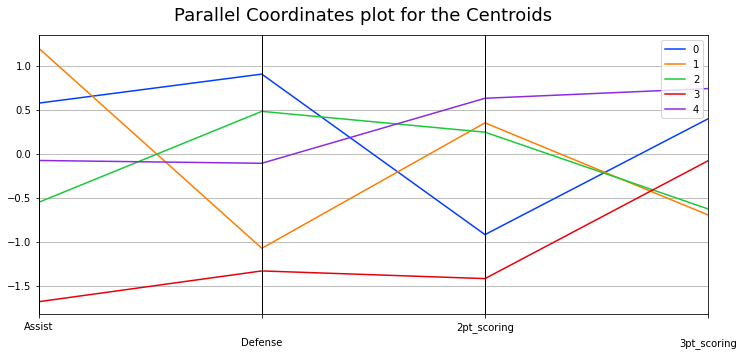

In [ ]:
# Create a data frame containing our centroids
centroids5['cluster'] = centroids5.index

palette = sns.color_palette("bright", 10)

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids5, 5)

- **Cluster0**:
    - Assist stat과 Defense stat이 높고 2pt scoring stat은 낮으나 3pt scoring stat은 평이한 선수

- **Cluster1**
    - Assist stat이 높고 2pt_scoring stat은 준수하며, Defense stat과 3pt scoring stat은 낮은 선수

- **Cluster2**
    - Assist stat과 3pt scoring stat이 낮고 Defense stat은 준수하지만 2pt_scoring stat은 평이한 선수(득점보다는 수비에 더 능한 선수이므로 외곽보다는 골밑의 페인트존 안에서 몸싸움을 많이 하는 Center 포지션의 선수로 유추해 볼 수 있다.)

- **Cluster3**
    - Assist stat, Defense stat과 2pt scoring stat이 낮은 선수(전반적으로 부진한 선수)
    - 특이한 점으로는 3점슛 능력은 평균에 근접하게 나타났다.
- **Cluster4**
    - Assist stat및 Defense stat은 평이하지만, 2pt_scoring stat과 3pt_scoring stat과 같은 득점에 기여를 하는 선수(2점과 3점 득점력이 전체적으로 준수한 선수이므로 Point Guard나 Shooting Guard 포지션의 선수로 유추해 볼 수 있다.)

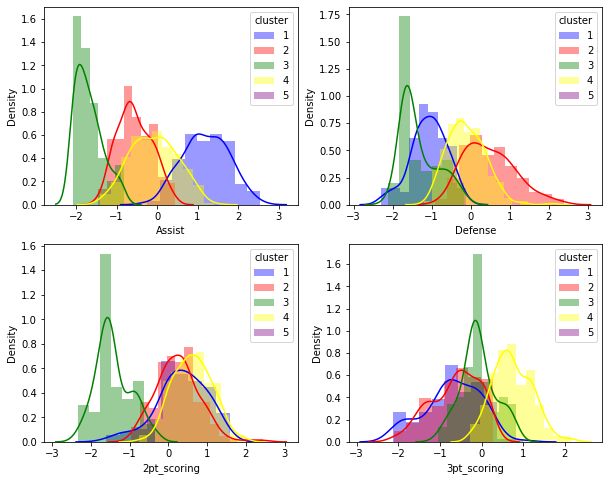

In [ ]:
# 시각화방법 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
plt.subplot(2,2,1) 
sns.distplot(data_prime7[data_prime7.k_means_cluster == 1]["Assist"], 
             color="blue", label=1)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 2]["Assist"], 
             color="red", label=2)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 3]["Assist"], 
             color="green", label=3)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 4]["Assist"], 
             color="yellow", label=4)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 5]["Assist"], 
             color="purple", label=5)
plt.legend(title="cluster")


plt.subplot(2,2,2) 
sns.distplot(data_prime7[data_prime7.k_means_cluster == 1]["Defense"], 
             color="blue", label=1)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 2]["Defense"], 
             color="red", label=2)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 3]["Defense"], 
             color="green", label=3)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 4]["Defense"], 
             color="yellow", label=4)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 5]["Defense"], 
             color="purple", label=5)
plt.legend(title="cluster")


plt.subplot(2,2,3)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 1]["2pt_scoring"], 
             color="blue", label=1)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 2]["2pt_scoring"], 
             color="red", label=2)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 3]["2pt_scoring"], 
             color="green", label=3)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 4]["2pt_scoring"], 
             color="yellow", label=4)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 5]["2pt_scoring"], 
             color="purple", label=5)
plt.legend(title="cluster")


plt.subplot(2,2,4)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 1]["3pt_scoring"], 
             color="blue", label=1)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 2]["3pt_scoring"], 
             color="red", label=2)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 3]["3pt_scoring"], 
             color="green", label=3)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 4]["3pt_scoring"], 
             color="yellow", label=4)
sns.distplot(data_prime7[data_prime7.k_means_cluster == 5]["3pt_scoring"], 
             color="purple", label=5)
plt.legend(title="cluster")


plt.show()

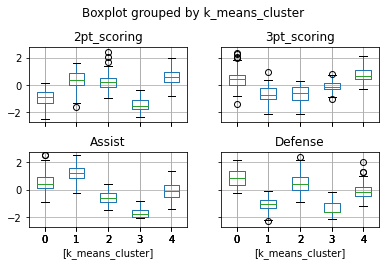

In [ ]:
# 시각화방법 2
data_prime7.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

# References

1. [농구선수 포지션](https://en.wikipedia.org/wiki/Basketball_positions)

2. [encoding = 'latin-1'](https://docs.python.org/3/library/codecs.html#standard-encodings)

3. [Factor Analysis Rotations](https://m.blog.naver.com/shoutjoy/221802826087)

3. [pandas deepcopy](https://blockdmask.tistory.com/576)

4. [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

5. [Clustering Performance](https://hongl.tistory.com/161)

6. [Silhouette coefficient 부호가 갖는 의미](https://studying-haeung.tistory.com/10)

7. [Complete linkage method](https://www.statisticshowto.com/complete-linkage-clustering/)

8. [Ward's method](https://www.statisticshowto.com/wards-method/)

9. [Average linkage method](https://towardsdatascience.com/introduction-hierarchical-clustering-d3066c6b560e)

10. [Weighted linkage method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

11. [Median linkage method](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/methods-and-formulas/linkage-methods/)

12. [Parallel Coordinates plot](https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb)



